In [1]:
import sys
import os

In [2]:
# run_path = "/home/harishbabu/projects/PIPNet/runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/158-PruningNaiveHPIPNetExpWeightPruning_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/159-PruningNaiveHPIPNetMaskL1=1.0_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/160-PruningNaiveHPIPNetMaskL1=0.5_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/161-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15eps_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/projects/ml4science/harishbabu/projects/PIPNet/162-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/163-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.2MinCont=0.1_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/projects/ml4science/harishbabu/projects/PIPNet/164-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/167-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

run_path = "/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/202-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=05epsEps=60Cl=2.0TanhDesc=0.05MinCont=0.1_cnext13_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=10pc"

# run_path = "/home/harishbabu/projects/PIPNet/runs/207-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=05epsEps=60Cl=2.0TanhDesc=0.05MinCont=0.1_cnext26_BUT-51-224_WeightedCE_with-equalize-aug_img=224_nprotos=10pc"

# run_path = "/home/harishbabu/projects/PIPNet/runs/208-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=05epsEps=60Cl=2.0TanhDesc=0.05MinCont=0.1_cnext26_FISH-38-224_WeightedCE_with-equalize-aug_img=224_nprotos=10pc"

try:
    sys.path.remove('/home/harishbabu/projects/PIPNet')
except:
    pass
sys.path.insert(0, os.path.join(run_path, 'source_clone'))


In [3]:
print(run_path)

/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20


In [4]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

from torchvision.datasets.folder import ImageFolder
from torch.utils.data import DataLoader
import torch.nn.functional as F
# from skimage.filters import threshold_local, gaussian
import ntpath

In [5]:
print(sys.path[0])

/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20/source_clone


In [6]:
# import pipnet.pipnet
# from pipnet.pipnet import PIPNet, get_network
# # from pipnet import pipnet
# print(pipnet.__file__)
from util import node
print(node.__file__)

/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20/source_clone/util/node.py


In [7]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

Heatmaps showing where a prototype is found will not be generated because OpenCV is not installed.


In [8]:
from PIL import Image
import numpy as np
import pdb

# def get_heatmap(latent_activation, input_image):
#     image_a = latent_activation.cpu().numpy()
#     image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

#     input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
#     image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
#     reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
#     normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
#     heatmap_colormap = plt.get_cmap('jet')
#     heatmap_colored = heatmap_colormap(normalized_heatmap)
    
#     heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
#     image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
#     image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
#     result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
#     return np.array(result_image)

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    if constant_color_scale:
        normalized_heatmap = np.concatenate((normalized_heatmap, np.zeros((normalized_heatmap.shape[1], 1)), np.ones((normalized_heatmap.shape[1], 1))), axis=1)
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_bb_gaussian_threshold(latent_activation, sigma=1.0, percentile=97, extend_h=0, extend_w=0):
    # latent_activation -> []
    upscaled_similarity = get_upscaled_activation_uninterpolated(latent_activation, \
                                                                 image_size=(args.image_size, args.image_size))
    upscaled_similarity = minmaxscale(upscaled_similarity)
    upscaled_similarity = gaussian(upscaled_similarity, sigma=sigma)
    upscaled_similarity = threshold_local(upscaled_similarity, block_size=15, method='mean')
    h_min, h_max, w_min, w_max = find_top_percentile_bbox(upscaled_similarity ,percentile=97)
    h_min = max(0, h_min-extend_h)
    h_max = min(upscaled_similarity.shape[0], h_max+extend_h)
    w_min = max(0, w_min-extend_w)
    w_max = min(upscaled_similarity.shape[1], w_max+extend_w)
    return h_min, h_max, w_min, w_max


def minmaxscale(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

from torch.utils.data import DataLoader, SequentialSampler
from torch.utils.data import DataLoader

def unshuffle_dataloader(dataloader):
    if type(dataloader.dataset) == ImageFolder:
        dataset = dataloader.dataset
    else:
        dataset = dataloader.dataset.dataset.dataset
    new_dataloader = DataLoader(
        dataset=dataset,
        batch_size=dataloader.batch_size,
        shuffle=False,
        num_workers=dataloader.num_workers,
        pin_memory=dataloader.pin_memory,
        drop_last=dataloader.drop_last,
        timeout=dataloader.timeout,
        worker_init_fn=dataloader.worker_init_fn,
        multiprocessing_context=dataloader.multiprocessing_context,
        generator=dataloader.generator,
        prefetch_factor=dataloader.prefetch_factor,
        persistent_workers=dataloader.persistent_workers
    )
    return new_dataloader

## Load Model

In [9]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
if exp_no == 77:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                                            min_protos=args.num_features)
else:
    if ('num_protos_per_child' in args) and ('num_protos_per_descendant' in args):
        if args.num_features == 0 and args.num_protos_per_descendant == 0 and args.num_protos_per_child == 0:
            raise Exception('Either of num_features or num_protos_per_descendant or num_protos_per_child must be greater than zero')
        for node in root.nodes_with_children():
            node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                num_protos_per_child=args.num_protos_per_child,\
                                min_protos=args.num_features,\
                                split_protos=('protopool' in args) and (args.protopool == 'n'))
    elif ('num_protos_per_descendant' in args):
        # update num of protos per node based on num_protos_per_descendant
        if args.num_features == 0 and args.num_protos_per_descendant == 0 and args.num_protos_per_child == 0:
            raise Exception('Either of num_features or num_protos_per_descendant or num_protos_per_child must be greater than zero')
        for node in root.nodes_with_children():
            node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                min_protos=args.num_features,\
                                split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [10]:
!which python

Illegal option --
Usage: /usr/bin/which [-a] args


In [11]:
args.batch_size = 1

print(args.batch_size)
print(args.dataset)

1
CUB-190-imgnet-224


In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

# args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
# args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
# ckpt_file_name = 'net_trained_30'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
ckpt_file_name = 'net_trained_last'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)

print(args.batch_size, trainloader.batch_size)

if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )

# Create a PIP-Net
if ('byol' in args) and (args.byol == 'y'):
    from pipnet.pipnet import PIPNetBYOL
    net = PIPNetBYOL(num_classes=len(classes),
                        num_prototypes=num_prototypes,
                        feature_net = feature_net,
                        args = args,
                        add_on_layers = add_on_layers,
                        pool_layer = pool_layer,
                        classification_layers = classification_layers,
                        num_parent_nodes = len(root.nodes_with_children()),
                        root = root
                        )
else:
    net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
        
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
# print(net.eval())
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
with torch.no_grad():
    xs1, _, _ = next(iter(trainloader))
    xs1 = xs1.to(device)
    _, proto_features, _, _ = net(xs1)
    wshape = proto_features['root'].shape[-1]
    args.wshape = wshape #needed for calculating image patch size
    print("Output shape: ", proto_features['root'].shape, flush=True)
    
print(args.wshape)

Dropping 0 samples from trainloader
Dropping 0 samples from trainloader_normal
Dropping 0 samples from trainloader_normal_augment
Num classes (k) =  190 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_005_Crested_Auklet'] etc.
1 1
Number of prototypes:  20
----------Prototypes per descendant: 0----------
Assigned 20 protos to node root
Assigned 20 protos to node 129+024+067
Assigned 20 protos to node 089+046
Assigned 20 protos to node 129+065
Assigned 20 protos to node 024+051
Assigned 20 protos to node 067+070
Assigned 20 protos to node 089+090
Assigned 20 protos to node 046+087
Assigned 20 protos to node 129+192
Assigned 20 protos to node 065+006
Assigned 20 protos to node 024+031
Assigned 20 protos to node 051+052
Assigned 20 protos to node 067+068
Assigned 20 protos to node 129+043
Assigned 20 protos to node 192+081
Assigned 20 protos to node 065+144
Assigned 20 protos to node 006+071
Assigned 20 protos to 

In [13]:
net.module._root_classification.weight

Parameter containing:
tensor([[ 0.0000,  3.2064,  0.0000,  3.8520,  0.7683,  0.0000,  5.0439,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.2300,  0.0658,  0.0000,  0.0000,  0.0000,  0.0000,
          0.5068,  0.0384,  0.0000, 12.2687]], device='cuda:0',
       requires_grad=True)

# Find subtree root - only for finding does not affect the run, use the value found here in the visualization block

In [14]:
# leaf_descendents = set(['cub_067_Anna_Hummingbird', 'cub_070_Green_Violetear', 'cub_072_Pomarine_Jaeger'])
# leaf_descendents = set(['cub_072_Pomarine_Jaeger', 'cub_083_White_breasted_Kingfisher'])
leaf_descendents = set(['cub_072_Pomarine_Jaeger', 'cub_147_Least_Tern'])
leaf_descendents = set(['cub_083_White_breasted_Kingfisher', 'cub_038_Great_Crested_Flycatcher'])
leaf_descendents = set(['cub_018_Spotted_Catbird', 'cub_038_Great_Crested_Flycatcher'])

subtree_root = root
for node in root.nodes_with_children():
    if leaf_descendents.issubset(node.leaf_descendents) and (len(node.leaf_descendents) < len(subtree_root.leaf_descendents)):
        subtree_root = node

# root.get_node('053+004')

print(subtree_root.name)

# 18 species subset 024+051

root


# Proto activations on leaf descendents - topk images using  NAIVE-HPIPNET with HEATMAP

In [14]:
# Proto activations on leaf descendents - topk images

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    # image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))

    if constant_color_scale:
        reshaped_image_a = np.concatenate((reshaped_image_a, np.zeros((reshaped_image_a.shape[1], 1)), np.ones((reshaped_image_a.shape[1], 1))*255), axis=1)
    
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = False # True, False # param
topk = 3
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = None # 'activation_as_npy'
if (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
plot_overspecificity_score = True
subtree_root = root.get_node('024+051')

from datetime import datetime
txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    
overspecificity_score_and_proto_mask = []

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    if (node.name not in subtree_root.descendents) and (node.name != subtree_root.name):
        print('Skipping node', node.name)
        continue

    if node.name in root.get_node('129+043').descendents:
        print('Skipping node', node.name)
        continue
        
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    # write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    if plot_overspecificity_score:
        for child_classname in class_and_prototypes:
            for p in class_and_prototypes[child_classname]:
                mean_activation_of_every_leaf = []
                for leaf_descendent in proto_mean_activations[p]:
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_activation_of_every_leaf.append(mean_activation)

                overspecificity_score = 1
                for mean_act in mean_activation_of_every_leaf:
                    overspecificity_score *= mean_act * 1.0
                proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
                proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
                proto_mask = proto_presence[p, 1].item()
                overspecificity_score_and_proto_mask.append((overspecificity_score, len(mean_activation_of_every_leaf), proto_mask))

    print('Node', node.name)
    for child_classname in class_and_prototypes:

        if (child_classname in root.get_node('129+043').descendents) or (child_classname == '129+043'):
            print('Skipping', child_classname)
            continue
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # # if the mean_activation is less for all leaf descendants skip the node
            # if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
            #     if find_non_descendants:
            #         print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
            #     else:
            #         print('\t'*2 + f'Skipping proto {p} of {node.name}')
            #         continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor, constant_color_scale=True)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    
                # weird thing padding should be zero for non descendants else it raises some error # change
                if find_non_descendants or (len(patches) == topk): # (len(patches) == topk) means there is only one leaf descendant
                    padding = 0
                else:
                    padding = 1

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding)

                # merging right description with the grid of images
                try:
                    grid = torch.cat([grid, grid_right_descriptions], dim=-1)
                except:
                    pdb.set_trace()

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_ep={epoch}_{subtree_root.name}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_ep={epoch}_{subtree_root.name}', node.name, f'{child_classname}-p{p}.png'))

txt_file.write('\n')
txt_file.close()
print('Done !!!')

Skipping node root
Skipping node 129+024+067
Skipping node 089+046
Skipping node 129+065
Skipping node 024+051
Skipping node 067+070
Skipping node 089+090
Skipping node 046+087


Node 129+192
Skipping 129+043
	 Child: 192+081
		Proto:19 036:(0.1063) 079:(0.3009) 080:(0.3149) 081:(0.3018) 082:(0.3851) 083:(0.315) 187:(0.136) 188:(0.1453) 189:(0.1149) 190:(0.3018) 191:(0.187) 192:(0.189) 
		Proto:17 036:(0.0504) 079:(0.187) 080:(0.1817) 081:(0.1395) 082:(0.1947) 083:(0.4346) 187:(0.1182) 188:(0.1301) 189:(0.0795) 190:(0.147) 191:(0.115) 192:(0.1938) 
		Proto:11 036:(0.9067) 079:(0.9154) 080:(0.9002) 081:(0.6546) 082:(0.923) 083:(0.564) 187:(0.5684) 188:(0.8395) 189:(0.9648) 190:(0.9478) 191:(0.7516) 192:(0.7791) 
		Proto:14 036:(0.0652) 079:(0.5519) 080:(0.4787) 081:(0.4297) 082:(0.7067) 083:(0.8716) 187:(0.6352) 188:(0.5102) 189:(0.3007) 190:(0.0792) 191:(0.4077) 192:(0.5158) 
Skipping node 065+006
Skipping node 024+031
Skipping node 051+052
Skipping node 067+068


Node 129+043
Skipping 129+018
Skipping 043+078


Node 192+081
	 Child: 192+036
		Proto:0 036:(0.9996) 187:(0.9842) 188:(0.9973) 189:(0.9989) 190:(0.945) 191:(0.9988) 192:(0.9732) 
		Proto:9 036:(0.9995) 187:(0.9991) 188:(0.9967) 189:(1.0) 190:(0.9987) 191:(0.9999) 192:(0.9968) 
		Proto:2 036:(0.9999) 187:(1.0) 188:(1.0) 189:(0.9992) 190:(0.9999) 191:(0.9999) 192:(1.0) 
		Proto:7 036:(0.9999) 187:(0.9973) 188:(0.9926) 189:(0.9998) 190:(0.9978) 191:(0.9989) 192:(0.9985) 
	 Child: 081+083
		Proto:11 079:(0.9983) 080:(0.9995) 081:(0.9991) 082:(0.9992) 083:(0.9942) 
		Proto:12 079:(0.9899) 080:(0.9958) 081:(0.9921) 082:(0.9829) 083:(0.9642) 
		Proto:14 079:(0.9993) 080:(0.9998) 081:(0.999) 082:(0.999) 083:(0.9964) 
		Proto:15 079:(0.9999) 080:(1.0) 081:(1.0) 082:(0.9999) 083:(1.0) 
		Proto:16 079:(1.0) 080:(1.0) 081:(0.9987) 082:(1.0) 083:(0.9998) 
Skipping node 065+144
Skipping node 006+071
Skipping node 024+086
Skipping node 031+004
Skipping node 051+053
Skipping node 067+069
Skipping node 129+018
Skipping node 043+078


Node 192+036
	 Child: 192+191
		Proto:9 187:(0.9948) 189:(0.9933) 190:(0.9925) 191:(0.9984) 192:(0.9939) 
		Proto:2 187:(1.0) 189:(0.9995) 190:(0.9993) 191:(1.0) 192:(0.9998) 
	 Child: 036+188
		Proto:10 036:(0.999) 188:(0.9996) 
		Proto:14 036:(1.0) 188:(0.9996) 


Node 081+083
	 Child: 081+082
		Proto:2 079:(0.9999) 080:(1.0) 081:(0.9999) 082:(0.9999) 
		Proto:4 079:(1.0) 080:(0.9999) 081:(0.9999) 082:(1.0) 
	 Child: cub_083_White_breasted_Kingfisher
		Proto:12 083:(0.9995) 
		Proto:15 083:(1.0) 
Skipping node 065+084
Skipping node 144+147
Skipping node 006+058
Skipping node 071+072
Skipping node 024+001
Skipping node 031+032
Skipping node 051+050
Skipping node 129+107
Skipping node 043+042
Skipping node 078+038


Node 192+191
	 Child: 192+187
		Proto:8 187:(0.9989) 190:(0.9992) 192:(0.9998) 
		Proto:5 187:(1.0) 190:(1.0) 192:(1.0) 
		Proto:6 187:(1.0) 190:(1.0) 192:(1.0) 
	 Child: 191+189
		Proto:17 189:(0.9998) 191:(0.9999) 
		Proto:13 189:(1.0) 191:(1.0) 
		Proto:14 189:(1.0) 191:(1.0) 


Node 036+188
	 Child: cub_036_Northern_Flicker
		Proto:2 036:(1.0) 
	 Child: cub_188_Pileated_Woodpecker
		Proto:11 188:(1.0) 
		Proto:12 188:(1.0) 


Node 081+082
	 Child: 081+080
		Proto:0 080:(1.0) 081:(1.0) 
	 Child: 082+079
		Proto:12 079:(1.0) 082:(0.9994) 
		Proto:13 079:(1.0) 082:(0.9997) 
Skipping node 065+061
Skipping node 084+063
Skipping node 144+143
Skipping node 006+008
Skipping node 024+100
Skipping node 001+045
Skipping node 031+033
Skipping node 129+136
Skipping node 107+151
Skipping node 043+040
Skipping node 078+041


Node 192+187
	 Child: 192+190
		Proto:2 190:(1.0) 192:(1.0) 
	 Child: cub_187_American_Three_toed_Woodpecker
		Proto:13 187:(1.0) 


Node 191+189
	 Child: cub_191_Red_headed_Woodpecker
		Proto:0 191:(1.0) 
		Proto:5 191:(1.0) 
	 Child: cub_189_Red_bellied_Woodpecker
		Proto:19 189:(1.0) 
		Proto:12 189:(1.0) 


Node 081+080
	 Child: cub_081_Pied_Kingfisher
		Proto:7 081:(1.0) 
	 Child: cub_080_Green_Kingfisher
		Proto:17 080:(1.0) 


Node 082+079
	 Child: cub_082_Ringed_Kingfisher
		Proto:6 082:(1.0) 
	 Child: cub_079_Belted_Kingfisher
		Proto:12 079:(1.0) 
Skipping node 065+066
Skipping node 061+064
Skipping node 144+142
Skipping node 006+005
Skipping node 008+106
Skipping node 024+023
Skipping node 100+101
Skipping node 001+003
Skipping node 129+199
Skipping node 136+085
Skipping node 107+111
Skipping node 151+153
Skipping node 043+037
Skipping node 040+102
Skipping node 078+077


Node 192+190
	 Child: cub_192_Downy_Woodpecker
		Proto:4 192:(1.0) 
	 Child: cub_190_Red_cockaded_Woodpecker
		Proto:10 190:(1.0) 
		Proto:18 190:(1.0) 
Skipping node 065+062
Skipping node 144+145
Skipping node 006+007
Skipping node 024+025
Skipping node 001+002
Skipping node 129+118
Skipping node 199+186
Skipping node 136+138
Skipping node 107+073
Skipping node 111+112
Skipping node 151+157
Skipping node 153+154
Skipping node 043+039
Skipping node 065+059
Skipping node 144+146
Skipping node 129+104
Skipping node 199+150
Skipping node 186+185
Skipping node 136+137
Skipping node 107+093
Skipping node 073+074
Skipping node 151+156
Skipping node 157+152
Skipping node 153+155
Skipping node 065+060
Skipping node 144+141
Skipping node 129+035
Skipping node 199+094
Skipping node 150+019
Skipping node 107+030
Skipping node 129+054
Skipping node 035+055
Skipping node 199+028
Skipping node 150+149
Skipping node 107+029
Skipping node 129+175
Skipping node 054+140
Skipping node 035+048
Skipping no

In [16]:
target_leaf = root.get_node('cub_053_Western_Grebe')
for node in root.nodes_with_children():
    if target_leaf.name in node.leaf_descendents:
        print(node.name)

root
129+024+067
024+051
051+052
051+053


# Proto activations on leaf descendents - topk images using  NAIVE-HPIPNET with HEATMAP (clean visualization)

In [16]:
# Proto activations on leaf descendents - topk images

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    # image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))

    if constant_color_scale:
        reshaped_image_a = np.concatenate((reshaped_image_a, np.zeros((reshaped_image_a.shape[1], 1)), np.ones((reshaped_image_a.shape[1], 1))*255), axis=1)
    
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import math
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = False # True, False # param
topk = 2
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = None # 'activation_as_npy'
if (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
plot_overspecificity_score = True
subtree_root = root.get_node('024+051')
    
from datetime import datetime
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    
overspecificity_score_and_proto_mask = []

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    if node.name not in subtree_root.descendents:
        print('Skipping node', node.name)
        continue

    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    # write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    if plot_overspecificity_score:
        for child_classname in class_and_prototypes:
            for p in class_and_prototypes[child_classname]:
                mean_activation_of_every_leaf = []
                for leaf_descendent in proto_mean_activations[p]:
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_activation_of_every_leaf.append(mean_activation)

                overspecificity_score = 1
                for mean_act in mean_activation_of_every_leaf:
                    overspecificity_score *= mean_act * 1.0
                proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
                proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
                proto_mask = proto_presence[p, 1].item()
                overspecificity_score_and_proto_mask.append((overspecificity_score, len(mean_activation_of_every_leaf), proto_mask))

    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # # if the mean_activation is less for all leaf descendants skip the node
            # if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
            #     if find_non_descendants:
            #         print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
            #     else:
            #         print('\t'*2 + f'Skipping proto {p} of {node.name}')
            #         continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch

                font_size = 40
                fnt = ImageFont.truetype("arial.ttf", font_size)
                max_width = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength('-', font=fnt)
                
                for leaf_descendent in proto_mean_activations[p]:
                    for word in leaf_descendent.split('_')[2:]:
                        width_of_word = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength(word, font=fnt)
                        max_width = max(max_width, width_of_word)

                for leaf_descendent, heap in proto_mean_activations[p].items():
                    species_name = ' '.join(leaf_descendent.split('_')[2:])
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        # latent_activation[latent_activation < torch.quantile(latent_activation, 0.75).item()] = 0.
                        # latent_activation[latent_activation < 1.5] = 0.
                        # pdb.set_trace()
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor, constant_color_scale=True)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        # overlayed_image = img_tensor
                        patches.append(overlayed_image)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # # description on the right hand side
                    # text = f'{mean_activation}, {leaf_descendent}'
                    # txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (255, 255, 255))
                    # draw = D.Draw(txtimage)
                    # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="black", font=font)
                    # pdb.set_trace()
                    # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    # right_descriptions.append(txttensor)

                    text = '\n'.join(species_name.split(' '))
                    
                    image_size = (math.ceil(max_width) + 10, patches[0].shape[-1])
                    txtimage = Image.new("RGB", image_size, (255, 255, 255))
                    d = ImageDraw.Draw(txtimage)
                    d.multiline_text((image_size[0]/2, image_size[1]/2), text, font=fnt, fill=(0, 0, 0), align ="center", anchor="mm")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    

                padding = 0

                # grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding, border=0)
                # grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding, border=0)
                # grid = torch.cat([grid_right_descriptions, grid], dim=-1)

                grid_rows = []
                for k in range(len(proto_mean_activations[p])):
                    grid_row = torchvision.utils.make_grid(patches[k*topk:(k+1)*topk], nrow=topk, padding=padding, border=0)
                    grid_right_description = torchvision.utils.make_grid(right_descriptions[k], nrow=1, padding=padding, border=0)
                    grid_row = torch.cat([grid_right_description, grid_row], dim=-1)
                    grid_rows.append(grid_row)
                # grid = torch.cat(grid_rows, dim=0)
                grid = torchvision.utils.make_grid(grid_rows, nrow=1, padding=5, pad_value=1.)
                    
                # # description on the top
                # text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                # txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                # draw = D.Draw(txtimage)
                # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                # grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_clean_ep={epoch}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_clean_ep={epoch}', node.name, f'{child_classname}-p{p}.png'), border=0) # , border_color=(255, 255, 255), border=10

# txt_file.write('\n')
# txt_file.close()
print('Done !!!')

Skipping node root


Node 001+029+044
	 Child: 001+010
		Proto:0 but_001_Taygetis_cleopatra_ott3105132:(0.9757) but_002_Taygetis_thamyra_ott483838:(0.6139) but_003_Morpho_menelaus_ott830884:(0.9623) but_004_Morpho_helenor_ott634337:(0.9988) but_005_Opsiphanes_invirae_ott1056460:(0.9996) but_006_Catoblepia_berecynthia_ott3104050:(0.8694) but_007_Caligo_idomeneus_ott401861:(0.9993) but_008_Caligo_eurilochus_ott572882:(0.996) but_009_Bia_actorion_ott451938:(0.9729) but_010_Hypna_clytemnestra_ott552641:(0.9763) but_011_Memphis_glauce_ott235310:(0.9948) but_012_Memphis_moruus_ott834399:(0.9584) 
		Proto:8 but_001_Taygetis_cleopatra_ott3105132:(0.8395) but_002_Taygetis_thamyra_ott483838:(0.9044) but_003_Morpho_menelaus_ott830884:(0.9685) but_004_Morpho_helenor_ott634337:(0.6457) but_005_Opsiphanes_invirae_ott1056460:(0.8951) but_006_Catoblepia_berecynthia_ott3104050:(0.5974) but_007_Caligo_idomeneus_ott401861:(0.9528) but_008_Caligo_eurilochus_ott572882:(0.7243) but_009_Bia_actorion_ott451938:(0.7273) but_010_Hy

Node 056+057
	 Child: but_056_Rhetus_periander_ott3125491
		Proto:5 but_056_Rhetus_periander_ott3125491:(1.0) 
	 Child: but_057_Lasaia_agesilas_ott627865
		Proto:19 but_057_Lasaia_agesilas_ott627865:(1.0) 


Node 001+010
	 Child: 001+003
		Proto:8 but_001_Taygetis_cleopatra_ott3105132:(0.506) but_002_Taygetis_thamyra_ott483838:(0.9659) but_003_Morpho_menelaus_ott830884:(0.9982) but_004_Morpho_helenor_ott634337:(0.9932) but_005_Opsiphanes_invirae_ott1056460:(0.9871) but_006_Catoblepia_berecynthia_ott3104050:(0.9918) but_007_Caligo_idomeneus_ott401861:(0.9992) but_008_Caligo_eurilochus_ott572882:(0.9997) but_009_Bia_actorion_ott451938:(0.7919) 
		Proto:3 but_001_Taygetis_cleopatra_ott3105132:(0.9987) but_002_Taygetis_thamyra_ott483838:(0.9695) but_003_Morpho_menelaus_ott830884:(0.9954) but_004_Morpho_helenor_ott634337:(0.9956) but_005_Opsiphanes_invirae_ott1056460:(0.9891) but_006_Catoblepia_berecynthia_ott3104050:(0.9741) but_007_Caligo_idomeneus_ott401861:(0.9988) but_008_Caligo_eurilochus_ott572882:(0.9884) but_009_Bia_actorion_ott451938:(0.9929) 
		Proto:7 but_001_Taygetis_cleopatra_ott3105132:(0.9999) but_002_Taygetis_thamyra_ott483838:(0.9993) but_003_Morpho_menelaus_ott830884:(0.9576)

Node 029+038
	 Child: 029+036
		Proto:3 but_013_Heliconius_atthis_ott1024619:(0.7822) but_014_Heliconius_elevatus_ott1034618:(0.9982) but_015_Heliconius_ethilla_ott358146:(0.9948) but_016_Heliconius_numata_ott358148:(0.9731) but_017_Heliconius_ismenius_ott984238:(0.7746) but_018_Heliconius_melpomene_ott896444:(0.9951) but_019_Heliconius_timareta_ott145706:(0.9994) but_020_Heliconius_cydno_ott984236:(0.8663) but_021_Heliconius_pachinus_ott984241:(0.9902) but_022_Heliconius_wallacei_ott984240:(0.9985) but_023_Heliconius_hierax_ott372033:(0.9964) but_024_Heliconius_xanthocles_ott1034613:(0.9961) but_028_Heliconius_eleuchia_ott407976:(0.9534) but_029_Heliconius_sara_ott1034608:(0.9571) but_030_Heliconius_charithonia_ott259142:(0.9676) but_032_Heliconius_clysonymus_ott1034615:(0.8761) but_033_Heliconius_telesiphe_ott984230:(0.9865) but_034_Eueides_isabella_ott1034607:(0.9865) but_035_Eueides_aliphera_ott1034606:(0.6197) but_036_Dryadula_phaetusa_ott896449:(0.041) but_037_Dryas_iulia_ott4580

Node 044+054
	 Child: 044+045+052
		Proto:0 but_044_Catonephele_orites_ott773670:(0.9989) but_045_Eunica_pusilla_ott3116519:(0.8618) but_046_Eunica_marsolia_ott3116572:(0.9487) but_047_Temenis_laothoe_ott1079091:(0.9997) but_048_Nessaea_obrinus_ott3116445:(0.9989) but_049_Batesia_hypochlora_ott451934:(0.9996) but_052_Pyrrhogyra_amphiro_ott3116287:(0.993) but_053_Pyrrhogyra_otolais_ott461907:(0.9976) 
		Proto:4 but_044_Catonephele_orites_ott773670:(0.9997) but_045_Eunica_pusilla_ott3116519:(0.9996) but_046_Eunica_marsolia_ott3116572:(0.9752) but_047_Temenis_laothoe_ott1079091:(0.9983) but_048_Nessaea_obrinus_ott3116445:(0.9999) but_049_Batesia_hypochlora_ott451934:(0.9998) but_052_Pyrrhogyra_amphiro_ott3116287:(0.9959) but_053_Pyrrhogyra_otolais_ott461907:(0.997) 
	 Child: 054+055
		Proto:11 but_054_Tigridia_acesta_ott105886:(1.0) but_055_Colobura_dirce_ott977975:(1.0) 


Node 001+003
	 Child: 001+002
		Proto:0 but_001_Taygetis_cleopatra_ott3105132:(0.9999) but_002_Taygetis_thamyra_ott483838:(0.9999) 
		Proto:4 but_001_Taygetis_cleopatra_ott3105132:(0.9978) but_002_Taygetis_thamyra_ott483838:(0.9999) 
		Proto:7 but_001_Taygetis_cleopatra_ott3105132:(1.0) but_002_Taygetis_thamyra_ott483838:(0.9996) 
	 Child: 003+005
		Proto:18 but_003_Morpho_menelaus_ott830884:(1.0) but_004_Morpho_helenor_ott634337:(1.0) but_005_Opsiphanes_invirae_ott1056460:(0.9996) but_006_Catoblepia_berecynthia_ott3104050:(0.9992) but_007_Caligo_idomeneus_ott401861:(1.0) but_008_Caligo_eurilochus_ott572882:(1.0) but_009_Bia_actorion_ott451938:(0.6667) 
		Proto:19 but_003_Morpho_menelaus_ott830884:(0.9994) but_004_Morpho_helenor_ott634337:(0.958) but_005_Opsiphanes_invirae_ott1056460:(0.9084) but_006_Catoblepia_berecynthia_ott3104050:(0.9959) but_007_Caligo_idomeneus_ott401861:(0.999) but_008_Caligo_eurilochus_ott572882:(0.9988) but_009_Bia_actorion_ott451938:(0.7281) 
		Proto:14 but_0

Node 010+011
	 Child: but_010_Hypna_clytemnestra_ott552641
		Proto:1 but_010_Hypna_clytemnestra_ott552641:(1.0) 
	 Child: 011+012
		Proto:12 but_011_Memphis_glauce_ott235310:(1.0) but_012_Memphis_moruus_ott834399:(1.0) 
		Proto:13 but_011_Memphis_glauce_ott235310:(0.9999) but_012_Memphis_moruus_ott834399:(0.9998) 


Node 029+036
	 Child: 029+034
		Proto:9 but_013_Heliconius_atthis_ott1024619:(0.9999) but_014_Heliconius_elevatus_ott1034618:(0.9999) but_015_Heliconius_ethilla_ott358146:(0.9999) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(0.9907) but_018_Heliconius_melpomene_ott896444:(1.0) but_019_Heliconius_timareta_ott145706:(1.0) but_020_Heliconius_cydno_ott984236:(0.9989) but_021_Heliconius_pachinus_ott984241:(0.9999) but_022_Heliconius_wallacei_ott984240:(1.0) but_023_Heliconius_hierax_ott372033:(0.9999) but_024_Heliconius_xanthocles_ott1034613:(1.0) but_028_Heliconius_eleuchia_ott407976:(0.9999) but_029_Heliconius_sara_ott1034608:(0.9998) but_030_Heliconius_charithonia_ott259142:(0.9997) but_032_Heliconius_clysonymus_ott1034615:(0.9963) but_033_Heliconius_telesiphe_ott984230:(0.9999) but_034_Eueides_isabella_ott1034607:(0.9996) but_035_Eueides_aliphera_ott1034606:(0.7365) 
		Proto:4 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1

Node 038+043
	 Child: 038+042
		Proto:9 but_038_Ithomia_xenos_ott265497:(1.0) but_039_Greta_nero_ott3119044:(1.0) but_040_Godyris_zavaleta_ott411073:(1.0) but_041_Greta_annette_ott221639:(1.0) but_042_Hyposcada_virginiana_ott79749:(1.0) 
		Proto:3 but_038_Ithomia_xenos_ott265497:(0.9995) but_039_Greta_nero_ott3119044:(0.9973) but_040_Godyris_zavaleta_ott411073:(0.9999) but_041_Greta_annette_ott221639:(0.9274) but_042_Hyposcada_virginiana_ott79749:(0.9994) 
	 Child: but_043_Paititia_neglecta_ott361142
		Proto:11 but_043_Paititia_neglecta_ott361142:(1.0) 
		Proto:12 but_043_Paititia_neglecta_ott361142:(1.0) 
		Proto:14 but_043_Paititia_neglecta_ott361142:(1.0) 


Node 044+045+052
	 Child: but_044_Catonephele_orites_ott773670
		Proto:7 but_044_Catonephele_orites_ott773670:(1.0) 
	 Child: 045+047
		Proto:16 but_045_Eunica_pusilla_ott3116519:(0.9987) but_046_Eunica_marsolia_ott3116572:(0.9619) but_047_Temenis_laothoe_ott1079091:(0.9975) but_048_Nessaea_obrinus_ott3116445:(0.9985) but_049_Batesia_hypochlora_ott451934:(0.9981) 
		Proto:10 but_045_Eunica_pusilla_ott3116519:(0.9009) but_046_Eunica_marsolia_ott3116572:(0.5606) but_047_Temenis_laothoe_ott1079091:(0.9684) but_048_Nessaea_obrinus_ott3116445:(0.9605) but_049_Batesia_hypochlora_ott451934:(0.9142) 
		Proto:11 but_045_Eunica_pusilla_ott3116519:(0.9943) but_046_Eunica_marsolia_ott3116572:(0.9766) but_047_Temenis_laothoe_ott1079091:(0.9921) but_048_Nessaea_obrinus_ott3116445:(0.9948) but_049_Batesia_hypochlora_ott451934:(0.9865) 
		Proto:13 but_045_Eunica_pusilla_ott3116519:(0.9535) but_046_Eunica_marsolia_ott3116572:(0.9257) but_047_Temenis_laothoe_ott1079091:(0.9971) but_048_Nessaea_obrinus_o

Node 054+055
	 Child: but_054_Tigridia_acesta_ott105886
		Proto:8 but_054_Tigridia_acesta_ott105886:(1.0) 
	 Child: but_055_Colobura_dirce_ott977975
		Proto:17 but_055_Colobura_dirce_ott977975:(0.9989) 
		Proto:10 but_055_Colobura_dirce_ott977975:(1.0) 


Node 001+002
	 Child: but_001_Taygetis_cleopatra_ott3105132
		Proto:3 but_001_Taygetis_cleopatra_ott3105132:(0.9998) 
		Proto:6 but_001_Taygetis_cleopatra_ott3105132:(0.9991) 
		Proto:7 but_001_Taygetis_cleopatra_ott3105132:(1.0) 
	 Child: but_002_Taygetis_thamyra_ott483838
		Proto:14 but_002_Taygetis_thamyra_ott483838:(0.9565) 


Node 003+005
	 Child: 003+004
		Proto:9 but_003_Morpho_menelaus_ott830884:(0.9997) but_004_Morpho_helenor_ott634337:(0.9991) 
		Proto:2 but_003_Morpho_menelaus_ott830884:(0.9997) but_004_Morpho_helenor_ott634337:(0.9991) 
		Proto:3 but_003_Morpho_menelaus_ott830884:(0.9994) but_004_Morpho_helenor_ott634337:(1.0) 
	 Child: 005+009
		Proto:18 but_005_Opsiphanes_invirae_ott1056460:(0.9994) but_006_Catoblepia_berecynthia_ott3104050:(0.9995) but_007_Caligo_idomeneus_ott401861:(0.999) but_008_Caligo_eurilochus_ott572882:(0.9866) but_009_Bia_actorion_ott451938:(0.9999) 
		Proto:14 but_005_Opsiphanes_invirae_ott1056460:(1.0) but_006_Catoblepia_berecynthia_ott3104050:(1.0) but_007_Caligo_idomeneus_ott401861:(0.9997) but_008_Caligo_eurilochus_ott572882:(0.9972) but_009_Bia_actorion_ott451938:(1.0) 
		Proto:15 but_005_Opsiphanes_invirae_ott1056460:(0.9999) but_006_Catoblepia_berecynthia_ott3104050:(1.0) but_007_Caligo_idomeneus_ott401861:(0.9994) but_008_Caligo_eurilochus_ott572882:(0.9916) but_0

Node 011+012
	 Child: but_011_Memphis_glauce_ott235310
		Proto:1 but_011_Memphis_glauce_ott235310:(1.0) 
		Proto:2 but_011_Memphis_glauce_ott235310:(1.0) 
	 Child: but_012_Memphis_moruus_ott834399
		Proto:19 but_012_Memphis_moruus_ott834399:(1.0) 


Node 029+034
	 Child: 029+013
		Proto:1 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(0.9973) but_015_Heliconius_ethilla_ott358146:(0.9999) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(1.0) but_018_Heliconius_melpomene_ott896444:(1.0) but_019_Heliconius_timareta_ott145706:(0.9999) but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(1.0) but_022_Heliconius_wallacei_ott984240:(0.9999) but_023_Heliconius_hierax_ott372033:(0.9998) but_024_Heliconius_xanthocles_ott1034613:(0.9998) but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(0.9999) but_030_Heliconius_charithonia_ott259142:(0.9993) but_032_Heliconius_clysonymus_ott1034615:(0.9991) but_033_Heliconius_telesiphe_ott984230:(0.9928) 
		Proto:9 but_013_Heliconius_atthis_ott1024619:(0.9999) but_014_Heliconius_elevatus_ott1034618:(1.0) but_015_Heliconius_ethilla_ott358146:(0.9737) but_016_Heliconius_numata_ott35814

Node 036+037
	 Child: but_036_Dryadula_phaetusa_ott896449
		Proto:1 but_036_Dryadula_phaetusa_ott896449:(0.9997) 
	 Child: but_037_Dryas_iulia_ott458065
		Proto:14 but_037_Dryas_iulia_ott458065:(1.0) 
		Proto:15 but_037_Dryas_iulia_ott458065:(0.999) 


Node 038+042
	 Child: 038+039
		Proto:1 but_038_Ithomia_xenos_ott265497:(0.9999) but_039_Greta_nero_ott3119044:(0.9999) but_040_Godyris_zavaleta_ott411073:(0.9999) but_041_Greta_annette_ott221639:(0.9997) 
		Proto:4 but_038_Ithomia_xenos_ott265497:(1.0) but_039_Greta_nero_ott3119044:(0.9979) but_040_Godyris_zavaleta_ott411073:(0.9999) but_041_Greta_annette_ott221639:(0.9992) 
		Proto:5 but_038_Ithomia_xenos_ott265497:(0.9997) but_039_Greta_nero_ott3119044:(0.9999) but_040_Godyris_zavaleta_ott411073:(1.0) but_041_Greta_annette_ott221639:(0.9999) 
	 Child: but_042_Hyposcada_virginiana_ott79749
		Proto:19 but_042_Hyposcada_virginiana_ott79749:(1.0) 


Node 045+047
	 Child: 045+046
		Proto:1 but_045_Eunica_pusilla_ott3116519:(1.0) but_046_Eunica_marsolia_ott3116572:(0.9997) 
		Proto:9 but_045_Eunica_pusilla_ott3116519:(1.0) but_046_Eunica_marsolia_ott3116572:(0.9998) 
	 Child: 047+049
		Proto:17 but_047_Temenis_laothoe_ott1079091:(0.9999) but_048_Nessaea_obrinus_ott3116445:(1.0) but_049_Batesia_hypochlora_ott451934:(1.0) 
		Proto:10 but_047_Temenis_laothoe_ott1079091:(1.0) but_048_Nessaea_obrinus_ott3116445:(1.0) but_049_Batesia_hypochlora_ott451934:(1.0) 


Node 052+053
	 Child: but_052_Pyrrhogyra_amphiro_ott3116287
		Proto:2 but_052_Pyrrhogyra_amphiro_ott3116287:(1.0) 
		Proto:7 but_052_Pyrrhogyra_amphiro_ott3116287:(1.0) 
	 Child: but_053_Pyrrhogyra_otolais_ott461907
		Proto:15 but_053_Pyrrhogyra_otolais_ott461907:(1.0) 


Node 003+004
	 Child: but_003_Morpho_menelaus_ott830884
		Proto:2 but_003_Morpho_menelaus_ott830884:(0.9999) 
	 Child: but_004_Morpho_helenor_ott634337
		Proto:10 but_004_Morpho_helenor_ott634337:(0.9635) 
		Proto:12 but_004_Morpho_helenor_ott634337:(0.9991) 
		Proto:13 but_004_Morpho_helenor_ott634337:(0.9985) 
		Proto:15 but_004_Morpho_helenor_ott634337:(0.9967) 
		Proto:17 but_004_Morpho_helenor_ott634337:(0.9993) 


Node 005+009
	 Child: 005+007
		Proto:1 but_005_Opsiphanes_invirae_ott1056460:(0.9979) but_006_Catoblepia_berecynthia_ott3104050:(0.9996) but_007_Caligo_idomeneus_ott401861:(1.0) but_008_Caligo_eurilochus_ott572882:(0.9997) 
		Proto:2 but_005_Opsiphanes_invirae_ott1056460:(1.0) but_006_Catoblepia_berecynthia_ott3104050:(0.9981) but_007_Caligo_idomeneus_ott401861:(1.0) but_008_Caligo_eurilochus_ott572882:(0.9995) 
	 Child: but_009_Bia_actorion_ott451938
		Proto:12 but_009_Bia_actorion_ott451938:(0.9974) 
		Proto:13 but_009_Bia_actorion_ott451938:(0.9983) 


Node 029+013
	 Child: 029+032
		Proto:8 but_028_Heliconius_eleuchia_ott407976:(0.9974) but_029_Heliconius_sara_ott1034608:(0.9999) but_030_Heliconius_charithonia_ott259142:(0.9644) but_032_Heliconius_clysonymus_ott1034615:(0.977) but_033_Heliconius_telesiphe_ott984230:(1.0) 
		Proto:1 but_028_Heliconius_eleuchia_ott407976:(0.9999) but_029_Heliconius_sara_ott1034608:(0.9998) but_030_Heliconius_charithonia_ott259142:(0.9392) but_032_Heliconius_clysonymus_ott1034615:(0.9892) but_033_Heliconius_telesiphe_ott984230:(0.9962) 
		Proto:4 but_028_Heliconius_eleuchia_ott407976:(0.8496) but_029_Heliconius_sara_ott1034608:(0.9969) but_030_Heliconius_charithonia_ott259142:(0.6692) but_032_Heliconius_clysonymus_ott1034615:(0.6005) but_033_Heliconius_telesiphe_ott984230:(0.9951) 
	 Child: 013+023
		Proto:17 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(0.9921) but_015_Heliconius_ethilla_ott358146:(0.9901) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconiu

Node 034+035
	 Child: but_034_Eueides_isabella_ott1034607
		Proto:1 but_034_Eueides_isabella_ott1034607:(0.9999) 
		Proto:9 but_034_Eueides_isabella_ott1034607:(0.9999) 
	 Child: but_035_Eueides_aliphera_ott1034606
		Proto:16 but_035_Eueides_aliphera_ott1034606:(1.0) 


Node 038+039
	 Child: but_038_Ithomia_xenos_ott265497
		Proto:2 but_038_Ithomia_xenos_ott265497:(1.0) 
	 Child: 039+040
		Proto:13 but_039_Greta_nero_ott3119044:(1.0) but_040_Godyris_zavaleta_ott411073:(1.0) but_041_Greta_annette_ott221639:(1.0) 


Node 045+046
	 Child: but_045_Eunica_pusilla_ott3116519
		Proto:0 but_045_Eunica_pusilla_ott3116519:(0.9998) 
		Proto:8 but_045_Eunica_pusilla_ott3116519:(1.0) 
		Proto:2 but_045_Eunica_pusilla_ott3116519:(1.0) 
		Proto:4 but_045_Eunica_pusilla_ott3116519:(0.9948) 
	 Child: but_046_Eunica_marsolia_ott3116572
		Proto:13 but_046_Eunica_marsolia_ott3116572:(1.0) 


Node 047+049
	 Child: 047+048
		Proto:0 but_047_Temenis_laothoe_ott1079091:(1.0) but_048_Nessaea_obrinus_ott3116445:(0.9996) 
		Proto:7 but_047_Temenis_laothoe_ott1079091:(0.9999) but_048_Nessaea_obrinus_ott3116445:(1.0) 
	 Child: but_049_Batesia_hypochlora_ott451934
		Proto:16 but_049_Batesia_hypochlora_ott451934:(1.0) 
		Proto:17 but_049_Batesia_hypochlora_ott451934:(1.0) 


Node 005+007
	 Child: 005+006
		Proto:9 but_005_Opsiphanes_invirae_ott1056460:(1.0) but_006_Catoblepia_berecynthia_ott3104050:(0.9999) 
		Proto:3 but_005_Opsiphanes_invirae_ott1056460:(1.0) but_006_Catoblepia_berecynthia_ott3104050:(1.0) 
	 Child: 007+008
		Proto:13 but_007_Caligo_idomeneus_ott401861:(1.0) but_008_Caligo_eurilochus_ott572882:(0.9999) 


Node 029+032
	 Child: 029+030
		Proto:0 but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(1.0) but_030_Heliconius_charithonia_ott259142:(0.9998) 
		Proto:1 but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(1.0) but_030_Heliconius_charithonia_ott259142:(1.0) 
		Proto:7 but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(1.0) but_030_Heliconius_charithonia_ott259142:(0.9969) 
	 Child: 032+033
		Proto:19 but_032_Heliconius_clysonymus_ott1034615:(1.0) but_033_Heliconius_telesiphe_ott984230:(1.0) 


Node 013+023
	 Child: 013+022
		Proto:3 but_013_Heliconius_atthis_ott1024619:(0.9979) but_014_Heliconius_elevatus_ott1034618:(0.6528) but_015_Heliconius_ethilla_ott358146:(0.9974) but_016_Heliconius_numata_ott358148:(0.9859) but_017_Heliconius_ismenius_ott984238:(0.9994) but_018_Heliconius_melpomene_ott896444:(0.9747) but_019_Heliconius_timareta_ott145706:(0.9357) but_020_Heliconius_cydno_ott984236:(0.9996) but_021_Heliconius_pachinus_ott984241:(0.9333) but_022_Heliconius_wallacei_ott984240:(0.9997) 
		Proto:4 but_013_Heliconius_atthis_ott1024619:(0.9965) but_014_Heliconius_elevatus_ott1034618:(0.6123) but_015_Heliconius_ethilla_ott358146:(0.9974) but_016_Heliconius_numata_ott358148:(0.9995) but_017_Heliconius_ismenius_ott984238:(0.9903) but_018_Heliconius_melpomene_ott896444:(0.9867) but_019_Heliconius_timareta_ott145706:(0.999) but_020_Heliconius_cydno_ott984236:(0.9978) but_021_Heliconius_pachinus_ott984241:(0.9271) but_022_Heliconius_wallacei_ott984240:(0.9464) 
		Proto:5 but_013_H

Node 039+040
	 Child: but_039_Greta_nero_ott3119044
		Proto:1 but_039_Greta_nero_ott3119044:(1.0) 
	 Child: 040+041
		Proto:19 but_040_Godyris_zavaleta_ott411073:(1.0) but_041_Greta_annette_ott221639:(0.5751) 


Node 047+048
	 Child: but_047_Temenis_laothoe_ott1079091
		Proto:8 but_047_Temenis_laothoe_ott1079091:(0.9998) 
		Proto:5 but_047_Temenis_laothoe_ott1079091:(1.0) 
	 Child: but_048_Nessaea_obrinus_ott3116445
		Proto:12 but_048_Nessaea_obrinus_ott3116445:(1.0) 


Node 005+006
	 Child: but_005_Opsiphanes_invirae_ott1056460
		Proto:5 but_005_Opsiphanes_invirae_ott1056460:(1.0) 
	 Child: but_006_Catoblepia_berecynthia_ott3104050
		Proto:11 but_006_Catoblepia_berecynthia_ott3104050:(1.0) 


Node 007+008
	 Child: but_007_Caligo_idomeneus_ott401861
		Proto:0 but_007_Caligo_idomeneus_ott401861:(0.9831) 
		Proto:2 but_007_Caligo_idomeneus_ott401861:(0.9948) 
		Proto:5 but_007_Caligo_idomeneus_ott401861:(0.9996) 
	 Child: but_008_Caligo_eurilochus_ott572882
		Proto:10 but_008_Caligo_eurilochus_ott572882:(0.9999) 


Node 029+030
	 Child: 029+028
		Proto:0 but_028_Heliconius_eleuchia_ott407976:(0.9998) but_029_Heliconius_sara_ott1034608:(1.0) 
		Proto:9 but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(1.0) 
		Proto:5 but_028_Heliconius_eleuchia_ott407976:(1.0) but_029_Heliconius_sara_ott1034608:(1.0) 
	 Child: but_030_Heliconius_charithonia_ott259142
		Proto:15 but_030_Heliconius_charithonia_ott259142:(1.0) 


Node 032+033
	 Child: but_032_Heliconius_clysonymus_ott1034615
		Proto:5 but_032_Heliconius_clysonymus_ott1034615:(0.9996) 
	 Child: but_033_Heliconius_telesiphe_ott984230
		Proto:16 but_033_Heliconius_telesiphe_ott984230:(1.0) 


Node 013+022
	 Child: 013+018
		Proto:9 but_013_Heliconius_atthis_ott1024619:(0.9994) but_014_Heliconius_elevatus_ott1034618:(0.9977) but_015_Heliconius_ethilla_ott358146:(0.9999) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(0.9995) but_018_Heliconius_melpomene_ott896444:(1.0) but_019_Heliconius_timareta_ott145706:(0.9728) but_020_Heliconius_cydno_ott984236:(0.9974) but_021_Heliconius_pachinus_ott984241:(0.9996) 
		Proto:4 but_013_Heliconius_atthis_ott1024619:(0.993) but_014_Heliconius_elevatus_ott1034618:(0.9989) but_015_Heliconius_ethilla_ott358146:(0.9993) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(0.9986) but_018_Heliconius_melpomene_ott896444:(0.9997) but_019_Heliconius_timareta_ott145706:(0.9998) but_020_Heliconius_cydno_ott984236:(0.9908) but_021_Heliconius_pachinus_ott984241:(0.9984) 
	 Child: but_022_Heliconius_wallacei_ott984240
		Proto:16 but_022_Heliconius_wallacei_ott984240:(0.9987) 
		Proto:18 but_0

Node 023+024
	 Child: but_023_Heliconius_hierax_ott372033
		Proto:9 but_023_Heliconius_hierax_ott372033:(1.0) 
	 Child: but_024_Heliconius_xanthocles_ott1034613
		Proto:17 but_024_Heliconius_xanthocles_ott1034613:(1.0) 
		Proto:10 but_024_Heliconius_xanthocles_ott1034613:(1.0) 


Node 040+041
	 Child: but_040_Godyris_zavaleta_ott411073
		Proto:2 but_040_Godyris_zavaleta_ott411073:(1.0) 
	 Child: but_041_Greta_annette_ott221639
		Proto:13 but_041_Greta_annette_ott221639:(1.0) 


Node 029+028
	 Child: but_029_Heliconius_sara_ott1034608
		Proto:9 but_029_Heliconius_sara_ott1034608:(1.0) 
		Proto:3 but_029_Heliconius_sara_ott1034608:(1.0) 
		Proto:4 but_029_Heliconius_sara_ott1034608:(1.0) 
		Proto:7 but_029_Heliconius_sara_ott1034608:(1.0) 
	 Child: but_028_Heliconius_eleuchia_ott407976
		Proto:19 but_028_Heliconius_eleuchia_ott407976:(1.0) 


Node 013+018
	 Child: 013+016
		Proto:8 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(0.9739) but_015_Heliconius_ethilla_ott358146:(0.9993) but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(0.9998) 
		Proto:9 but_013_Heliconius_atthis_ott1024619:(0.9978) but_014_Heliconius_elevatus_ott1034618:(0.959) but_015_Heliconius_ethilla_ott358146:(0.9964) but_016_Heliconius_numata_ott358148:(0.9972) but_017_Heliconius_ismenius_ott984238:(0.9997) 
		Proto:3 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(0.9509) but_015_Heliconius_ethilla_ott358146:(0.9998) but_016_Heliconius_numata_ott358148:(0.9989) but_017_Heliconius_ismenius_ott984238:(1.0) 
	 Child: 018+019
		Proto:11 but_018_Heliconius_melpomene_ott896444:(0.997) but_019_Heliconius_timareta_ott145706:(0.9983) but_020_Heliconius_cydno_ott984236:(0.9983) but_021_Heliconius_pachinus_ott984241:(0.969) 
		Proto:12 but_018_Heliconius_melpomene_o

Node 013+016
	 Child: 013+015
		Proto:4 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(1.0) but_015_Heliconius_ethilla_ott358146:(1.0) 
	 Child: 016+017
		Proto:16 but_016_Heliconius_numata_ott358148:(1.0) but_017_Heliconius_ismenius_ott984238:(0.9989) 


Node 018+019
	 Child: but_018_Heliconius_melpomene_ott896444
		Proto:8 but_018_Heliconius_melpomene_ott896444:(0.9999) 
		Proto:1 but_018_Heliconius_melpomene_ott896444:(1.0) 
		Proto:6 but_018_Heliconius_melpomene_ott896444:(0.9936) 
	 Child: 019+020
		Proto:19 but_019_Heliconius_timareta_ott145706:(0.9968) but_020_Heliconius_cydno_ott984236:(0.9976) but_021_Heliconius_pachinus_ott984241:(0.5849) 
		Proto:11 but_019_Heliconius_timareta_ott145706:(1.0) but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(0.9954) 
		Proto:13 but_019_Heliconius_timareta_ott145706:(0.9998) but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(1.0) 
		Proto:14 but_019_Heliconius_timareta_ott145706:(0.9994) but_020_Heliconius_cydno_ott984236:(0.9983) but_021_Heliconius_pachinus_ott984241:(0.9999) 


Node 013+015
	 Child: 013+014
		Proto:9 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(1.0) 
		Proto:3 but_013_Heliconius_atthis_ott1024619:(1.0) but_014_Heliconius_elevatus_ott1034618:(1.0) 
	 Child: but_015_Heliconius_ethilla_ott358146
		Proto:18 but_015_Heliconius_ethilla_ott358146:(1.0) 


Node 016+017
	 Child: but_016_Heliconius_numata_ott358148
		Proto:9 but_016_Heliconius_numata_ott358148:(1.0) 
		Proto:3 but_016_Heliconius_numata_ott358148:(1.0) 
		Proto:6 but_016_Heliconius_numata_ott358148:(1.0) 
	 Child: but_017_Heliconius_ismenius_ott984238
		Proto:18 but_017_Heliconius_ismenius_ott984238:(1.0) 


Node 019+020
	 Child: but_019_Heliconius_timareta_ott145706
		Proto:3 but_019_Heliconius_timareta_ott145706:(1.0) 
	 Child: 020+021
		Proto:16 but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(0.9994) 
		Proto:11 but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(0.9998) 
		Proto:14 but_020_Heliconius_cydno_ott984236:(1.0) but_021_Heliconius_pachinus_ott984241:(1.0) 


Node 013+014
	 Child: but_013_Heliconius_atthis_ott1024619
		Proto:7 but_013_Heliconius_atthis_ott1024619:(1.0) 
	 Child: but_014_Heliconius_elevatus_ott1034618
		Proto:11 but_014_Heliconius_elevatus_ott1034618:(1.0) 
		Proto:15 but_014_Heliconius_elevatus_ott1034618:(1.0) 


Node 020+021
	 Child: but_020_Heliconius_cydno_ott984236
		Proto:0 but_020_Heliconius_cydno_ott984236:(1.0) 
		Proto:2 but_020_Heliconius_cydno_ott984236:(1.0) 
		Proto:4 but_020_Heliconius_cydno_ott984236:(1.0) 
		Proto:7 but_020_Heliconius_cydno_ott984236:(1.0) 
		Proto:9 but_020_Heliconius_cydno_ott984236:(0.9999) 
	 Child: but_021_Heliconius_pachinus_ott984241
		Proto:17 but_021_Heliconius_pachinus_ott984241:(1.0) 
Done !!!


# With Color image and zoomed in image

In [16]:
# Proto activations on leaf descendents - topk images

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    # image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))

    if constant_color_scale:
        reshaped_image_a = np.concatenate((reshaped_image_a, np.zeros((reshaped_image_a.shape[1], 1)), np.ones((reshaped_image_a.shape[1], 1))*255), axis=1)
    
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    heatmap_colormap = plt.get_cmap('jet')
    # heatmap_colormap = plt.get_cmap('rainbow')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import math
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = False # True, False # param
topk = 3
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = None # 'activation_as_npy'
if (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
plot_overspecificity_score = True
subtree_root = root.get_node('024+051')
    
from datetime import datetime
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    
overspecificity_score_and_proto_mask = []

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    if (node.name not in subtree_root.descendents) and (node.name != subtree_root.name):
        print('Skipping node', node.name)
        continue

    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    # write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    if plot_overspecificity_score:
        for child_classname in class_and_prototypes:
            for p in class_and_prototypes[child_classname]:
                mean_activation_of_every_leaf = []
                for leaf_descendent in proto_mean_activations[p]:
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_activation_of_every_leaf.append(mean_activation)

                overspecificity_score = 1
                for mean_act in mean_activation_of_every_leaf:
                    overspecificity_score *= mean_act * 1.0
                proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
                proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
                proto_mask = proto_presence[p, 1].item()
                overspecificity_score_and_proto_mask.append((overspecificity_score, len(mean_activation_of_every_leaf), proto_mask))

    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # # if the mean_activation is less for all leaf descendants skip the node
            # if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
            #     if find_non_descendants:
            #         print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
            #     else:
            #         print('\t'*2 + f'Skipping proto {p} of {node.name}')
            #         continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch

                font_size = 40
                fnt = ImageFont.truetype("arial.ttf", font_size)
                max_width = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength('-', font=fnt)
                
                for leaf_descendent in proto_mean_activations[p]:
                    for word in leaf_descendent.split('_')[2:]:
                        width_of_word = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength(word, font=fnt)
                        max_width = max(max_width, width_of_word)

                for leaf_descendent, heap in proto_mean_activations[p].items():
                    if 'BUT' in args.dataset:
                        species_name = ' '.join(leaf_descendent.split('_')[2:4])
                    else:
                        species_name = ' '.join(leaf_descendent.split('_')[2:])
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)

                        overlayed_image_np = get_heatmap(latent_activation, img_tensor, constant_color_scale=True)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        
                        reshaped_latent_activation = np.array(Image.fromarray((latent_activation.cpu().numpy()[0] * 255).astype('uint8')).resize((img_tensor.shape[-1], img_tensor.shape[-1])))
                        center = np.unravel_index(np.argmax(reshaped_latent_activation), reshaped_latent_activation.shape)
                        # center = ((h_coor_min + h_coor_max) / 2., (w_coor_min + w_coor_max) / 2.)
                        patch_size = 64
                        h_coor_min = int(max(0, center[0] - (patch_size/2.)))
                        h_coor_max = int(min(img_tensor.shape[1], center[0] + (patch_size/2.)))
                        w_coor_min = int(max(0, center[1] - (patch_size/2.)))
                        w_coor_max = int(min(img_tensor.shape[2], center[1] + (patch_size/2.)))
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]

                        
                        
                        
                        # overlayed_image = img_tensor

                        

                        scale_factor = 1.7  # 70% increase

                        heatmap_patch = overlayed_image[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        resized_heatmap_patch = F.interpolate(heatmap_patch.unsqueeze(0), scale_factor=scale_factor, \
                                                      mode='bilinear', align_corners=False).squeeze(0)
                        resized_heatmap_patch = torchvision.utils.draw_bounding_boxes((resized_heatmap_patch * 255).to(torch.uint8), \
                                                                                torch.tensor([[0, 0, resized_heatmap_patch.shape[2], resized_heatmap_patch.shape[1]]]), \
                                                                                width=4, colors=(255, 0, 0))
                        resized_heatmap_patch = resized_heatmap_patch.float() / 255.
                        
                        resized_img_patch = F.interpolate(img_tensor_patch.unsqueeze(0), scale_factor=scale_factor, \
                                                      mode='bilinear', align_corners=False).squeeze(0)
                        resized_img_patch = torchvision.utils.draw_bounding_boxes((resized_img_patch * 255).to(torch.uint8), \
                                                                                torch.tensor([[0, 0, resized_img_patch.shape[2], resized_img_patch.shape[1]]]), \
                                                                                width=4, colors=(255, 255, 0))
                        resized_img_patch = resized_img_patch.float() / 255.
                        
                        resized_patch = torchvision.utils.make_grid([resized_img_patch, resized_heatmap_patch], nrow=1, padding=1, pad_value=1., border=1)
                        white_image = torch.ones(3, img_tensor.shape[1], img_tensor.shape[2])
                        patch_height = resized_patch.shape[1]
                        y_start = (white_image.shape[1] - patch_height) // 2                        
                        x_start = 10  # 10 pixels from the left
                        white_image[:, y_start:y_start+patch_height, x_start:x_start+resized_patch.shape[2]] = resized_patch

                        # Bounding box on original image
                        img_tensor = torchvision.utils.draw_bounding_boxes((img_tensor * 255).to(torch.uint8), \
                                                                                torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]]), \
                                                                                width=2, colors=(255, 255, 0))
                        img_tensor = img_tensor.float() / 255.

                        # Bounding box on overlayed image
                        overlayed_image = torchvision.utils.draw_bounding_boxes((overlayed_image * 255).to(torch.uint8), \
                                                                                torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]]), \
                                                                                width=2, colors=(255, 0, 0))
                        overlayed_image = overlayed_image.float() / 255.

                        grid_cell = torchvision.utils.make_grid([overlayed_image, img_tensor, white_image], nrow=3, padding=5, pad_value=1., border=1)

                        patches.append(grid_cell)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # # description on the right hand side
                    # text = f'{mean_activation}, {leaf_descendent}'
                    # txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (255, 255, 255))
                    # draw = D.Draw(txtimage)
                    # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="black", font=font)
                    # pdb.set_trace()
                    # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    # right_descriptions.append(txttensor)

                    text = '\n'.join(species_name.split(' '))
                    image_size = (math.ceil(max_width) + 10, patches[0].shape[1])
                    txtimage = Image.new("RGB", image_size, (255, 255, 255))
                    d = ImageDraw.Draw(txtimage)
                    d.multiline_text((image_size[0]/2, image_size[1]/2), text, font=fnt, fill=(0, 0, 0), align ="center", anchor="mm")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    

                padding = 0

                # grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding, border=0)
                # grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding, border=0)
                # grid = torch.cat([grid_right_descriptions, grid], dim=-1)

                grid_rows = []
                for k in range(len(proto_mean_activations[p])):
                    grid_row = torchvision.utils.make_grid(patches[k*topk:(k+1)*topk], nrow=topk, padding=padding, border=0)
                    grid_right_description = torchvision.utils.make_grid(right_descriptions[k], nrow=1, padding=padding, border=0)
                    # pdb.set_trace()
                    grid_row = torch.cat([grid_right_description, grid_row], dim=-1)
                    grid_rows.append(grid_row)
                # grid = torch.cat(grid_rows, dim=0)
                grid = torchvision.utils.make_grid(grid_rows, nrow=1, padding=5, pad_value=1.)
                    
                # # description on the top
                # text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                # txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                # draw = D.Draw(txtimage)
                # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                # grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_withbb_ep={epoch}_{subtree_root.name}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_withbb_ep={epoch}_{subtree_root.name}', node.name, f'{child_classname}-p{p}.png'), border=0) # , border_color=(255, 255, 255), border=10

# txt_file.write('\n')
# txt_file.close()
print('Done !!!')

Skipping node root
Skipping node 129+024+067
Skipping node 089+046
Skipping node 129+065


Node 024+051
	 Child: 024+031
		Proto:0 cub_001_Black_footed_Albatross:(0.9791) cub_002_Laysan_Albatross:(0.9921) cub_003_Sooty_Albatross:(0.9957) cub_004_Groove_billed_Ani:(0.9877) cub_023_Brandt_Cormorant:(0.9944) cub_024_Red_faced_Cormorant:(0.9853) cub_025_Pelagic_Cormorant:(0.9962) cub_031_Black_billed_Cuckoo:(0.9872) cub_032_Mangrove_Cuckoo:(0.9651) cub_033_Yellow_billed_Cuckoo:(0.9956) cub_045_Northern_Fulmar:(0.9937) cub_086_Pacific_Loon:(0.9573) cub_100_Brown_Pelican:(0.979) cub_101_White_Pelican:(0.9603) 
		Proto:4 cub_001_Black_footed_Albatross:(0.9954) cub_002_Laysan_Albatross:(0.9927) cub_003_Sooty_Albatross:(0.9931) cub_004_Groove_billed_Ani:(0.9862) cub_023_Brandt_Cormorant:(0.9981) cub_024_Red_faced_Cormorant:(0.888) cub_025_Pelagic_Cormorant:(0.9758) cub_031_Black_billed_Cuckoo:(0.9973) cub_032_Mangrove_Cuckoo:(0.998) cub_033_Yellow_billed_Cuckoo:(0.998) cub_045_Northern_Fulmar:(0.9119) cub_086_Pacific_Loon:(0.9808) cub_100_Brown_Pelican:(0.9978) cub_101_White_Pelican:

Node 024+031
	 Child: 024+086
		Proto:0 cub_001_Black_footed_Albatross:(0.994) cub_002_Laysan_Albatross:(0.9684) cub_003_Sooty_Albatross:(0.9985) cub_023_Brandt_Cormorant:(0.9884) cub_024_Red_faced_Cormorant:(0.9711) cub_025_Pelagic_Cormorant:(0.9909) cub_045_Northern_Fulmar:(0.9984) cub_086_Pacific_Loon:(0.9916) cub_100_Brown_Pelican:(0.9613) cub_101_White_Pelican:(0.878) 
		Proto:3 cub_001_Black_footed_Albatross:(0.9999) cub_002_Laysan_Albatross:(0.9998) cub_003_Sooty_Albatross:(0.9998) cub_023_Brandt_Cormorant:(0.9981) cub_024_Red_faced_Cormorant:(0.9996) cub_025_Pelagic_Cormorant:(0.9894) cub_045_Northern_Fulmar:(0.9998) cub_086_Pacific_Loon:(0.9976) cub_100_Brown_Pelican:(0.9998) cub_101_White_Pelican:(0.9999) 
		Proto:4 cub_001_Black_footed_Albatross:(0.9804) cub_002_Laysan_Albatross:(0.959) cub_003_Sooty_Albatross:(0.9801) cub_023_Brandt_Cormorant:(0.9366) cub_024_Red_faced_Cormorant:(0.9355) cub_025_Pelagic_Cormorant:(0.9437) cub_045_Northern_Fulmar:(0.9452) cub_086_Pacific_Loo

Node 051+052
	 Child: 051+053
		Proto:9 cub_050_Eared_Grebe:(0.9999) cub_051_Horned_Grebe:(0.9999) cub_053_Western_Grebe:(0.9999) 
		Proto:3 cub_050_Eared_Grebe:(1.0) cub_051_Horned_Grebe:(1.0) cub_053_Western_Grebe:(0.9999) 
		Proto:5 cub_050_Eared_Grebe:(0.9999) cub_051_Horned_Grebe:(1.0) cub_053_Western_Grebe:(1.0) 
		Proto:7 cub_050_Eared_Grebe:(1.0) cub_051_Horned_Grebe:(1.0) cub_053_Western_Grebe:(1.0) 
	 Child: cub_052_Pied_billed_Grebe
		Proto:16 cub_052_Pied_billed_Grebe:(1.0) 
		Proto:18 cub_052_Pied_billed_Grebe:(0.9998) 
		Proto:11 cub_052_Pied_billed_Grebe:(1.0) 
Skipping node 067+068
Skipping node 129+043
Skipping node 192+081
Skipping node 065+144
Skipping node 006+071


Node 024+086
	 Child: 024+001
		Proto:0 cub_001_Black_footed_Albatross:(0.9839) cub_002_Laysan_Albatross:(0.9972) cub_003_Sooty_Albatross:(0.9723) cub_023_Brandt_Cormorant:(0.9859) cub_024_Red_faced_Cormorant:(0.9933) cub_025_Pelagic_Cormorant:(0.9125) cub_045_Northern_Fulmar:(0.9285) cub_100_Brown_Pelican:(0.9989) cub_101_White_Pelican:(0.9986) 
		Proto:2 cub_001_Black_footed_Albatross:(0.9095) cub_002_Laysan_Albatross:(0.9363) cub_003_Sooty_Albatross:(0.956) cub_023_Brandt_Cormorant:(0.9761) cub_024_Red_faced_Cormorant:(0.9952) cub_025_Pelagic_Cormorant:(0.998) cub_045_Northern_Fulmar:(0.9765) cub_100_Brown_Pelican:(0.9978) cub_101_White_Pelican:(0.8875) 
		Proto:3 cub_001_Black_footed_Albatross:(0.9942) cub_002_Laysan_Albatross:(0.9994) cub_003_Sooty_Albatross:(0.9981) cub_023_Brandt_Cormorant:(0.9998) cub_024_Red_faced_Cormorant:(0.9999) cub_025_Pelagic_Cormorant:(1.0) cub_045_Northern_Fulmar:(0.9981) cub_100_Brown_Pelican:(0.9997) cub_101_White_Pelican:(0.998) 
		Proto:4 cub_001_B

Node 031+004
	 Child: 031+032
		Proto:0 cub_031_Black_billed_Cuckoo:(1.0) cub_032_Mangrove_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:2 cub_031_Black_billed_Cuckoo:(0.9999) cub_032_Mangrove_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:4 cub_031_Black_billed_Cuckoo:(1.0) cub_032_Mangrove_Cuckoo:(0.9999) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:7 cub_031_Black_billed_Cuckoo:(0.9999) cub_032_Mangrove_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:9 cub_031_Black_billed_Cuckoo:(0.9998) cub_032_Mangrove_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
	 Child: cub_004_Groove_billed_Ani
		Proto:19 cub_004_Groove_billed_Ani:(1.0) 
		Proto:13 cub_004_Groove_billed_Ani:(1.0) 


Node 051+053
	 Child: 051+050
		Proto:8 cub_050_Eared_Grebe:(1.0) cub_051_Horned_Grebe:(1.0) 
		Proto:2 cub_050_Eared_Grebe:(1.0) cub_051_Horned_Grebe:(1.0) 
		Proto:4 cub_050_Eared_Grebe:(1.0) cub_051_Horned_Grebe:(1.0) 
	 Child: cub_053_Western_Grebe
		Proto:17 cub_053_Western_Grebe:(1.0) 
		Proto:12 cub_053_Western_Grebe:(1.0) 
Skipping node 067+069
Skipping node 129+018
Skipping node 043+078
Skipping node 192+036
Skipping node 081+083
Skipping node 065+084
Skipping node 144+147
Skipping node 006+058
Skipping node 071+072


Node 024+001
	 Child: 024+100
		Proto:1 cub_023_Brandt_Cormorant:(1.0) cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(1.0) cub_100_Brown_Pelican:(0.9999) cub_101_White_Pelican:(0.9999) 
		Proto:2 cub_023_Brandt_Cormorant:(0.9876) cub_024_Red_faced_Cormorant:(0.9543) cub_025_Pelagic_Cormorant:(0.9994) cub_100_Brown_Pelican:(0.996) cub_101_White_Pelican:(0.9871) 
		Proto:4 cub_023_Brandt_Cormorant:(0.9995) cub_024_Red_faced_Cormorant:(0.9997) cub_025_Pelagic_Cormorant:(0.9991) cub_100_Brown_Pelican:(0.9927) cub_101_White_Pelican:(0.9899) 
		Proto:5 cub_023_Brandt_Cormorant:(0.9996) cub_024_Red_faced_Cormorant:(0.9983) cub_025_Pelagic_Cormorant:(0.9994) cub_100_Brown_Pelican:(0.9989) cub_101_White_Pelican:(0.9955) 
		Proto:6 cub_023_Brandt_Cormorant:(0.9401) cub_024_Red_faced_Cormorant:(0.9327) cub_025_Pelagic_Cormorant:(0.9862) cub_100_Brown_Pelican:(0.9992) cub_101_White_Pelican:(0.999) 
		Proto:7 cub_023_Brandt_Cormorant:(0.9996) cub_024_Red_faced_Cormorant:(0.9958) cub_0

Node 031+032
	 Child: 031+033
		Proto:3 cub_031_Black_billed_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:5 cub_031_Black_billed_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
		Proto:7 cub_031_Black_billed_Cuckoo:(1.0) cub_033_Yellow_billed_Cuckoo:(1.0) 
	 Child: cub_032_Mangrove_Cuckoo
		Proto:12 cub_032_Mangrove_Cuckoo:(1.0) 
		Proto:15 cub_032_Mangrove_Cuckoo:(1.0) 


Node 051+050
	 Child: cub_051_Horned_Grebe
		Proto:2 cub_051_Horned_Grebe:(0.9999) 
		Proto:4 cub_051_Horned_Grebe:(0.9999) 
		Proto:7 cub_051_Horned_Grebe:(1.0) 
	 Child: cub_050_Eared_Grebe
		Proto:19 cub_050_Eared_Grebe:(1.0) 
		Proto:18 cub_050_Eared_Grebe:(0.9997) 
		Proto:11 cub_050_Eared_Grebe:(1.0) 
Skipping node 129+107
Skipping node 043+042
Skipping node 078+038
Skipping node 192+191
Skipping node 036+188
Skipping node 081+082
Skipping node 065+061
Skipping node 084+063
Skipping node 144+143
Skipping node 006+008


Node 024+100
	 Child: 024+023
		Proto:4 cub_023_Brandt_Cormorant:(1.0) cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(1.0) 
		Proto:5 cub_023_Brandt_Cormorant:(0.9999) cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(1.0) 
		Proto:7 cub_023_Brandt_Cormorant:(0.9999) cub_024_Red_faced_Cormorant:(0.9999) cub_025_Pelagic_Cormorant:(0.9995) 
		Proto:8 cub_023_Brandt_Cormorant:(1.0) cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(1.0) 
		Proto:9 cub_023_Brandt_Cormorant:(1.0) cub_024_Red_faced_Cormorant:(0.9995) cub_025_Pelagic_Cormorant:(0.9999) 
	 Child: 100+101
		Proto:16 cub_100_Brown_Pelican:(1.0) cub_101_White_Pelican:(0.9999) 
		Proto:10 cub_100_Brown_Pelican:(1.0) cub_101_White_Pelican:(1.0) 
		Proto:19 cub_100_Brown_Pelican:(1.0) cub_101_White_Pelican:(1.0) 
		Proto:13 cub_100_Brown_Pelican:(0.9998) cub_101_White_Pelican:(0.9998) 


Node 001+045
	 Child: 001+003
		Proto:3 cub_001_Black_footed_Albatross:(1.0) cub_002_Laysan_Albatross:(0.9995) cub_003_Sooty_Albatross:(1.0) 
		Proto:4 cub_001_Black_footed_Albatross:(0.9999) cub_002_Laysan_Albatross:(1.0) cub_003_Sooty_Albatross:(0.9999) 
		Proto:5 cub_001_Black_footed_Albatross:(1.0) cub_002_Laysan_Albatross:(0.9997) cub_003_Sooty_Albatross:(0.9999) 
		Proto:7 cub_001_Black_footed_Albatross:(1.0) cub_002_Laysan_Albatross:(0.9999) cub_003_Sooty_Albatross:(1.0) 
		Proto:8 cub_001_Black_footed_Albatross:(1.0) cub_002_Laysan_Albatross:(0.9994) cub_003_Sooty_Albatross:(0.9998) 
	 Child: cub_045_Northern_Fulmar
		Proto:16 cub_045_Northern_Fulmar:(0.9984) 
		Proto:17 cub_045_Northern_Fulmar:(0.9997) 
		Proto:12 cub_045_Northern_Fulmar:(0.9998) 


Node 031+033
	 Child: cub_031_Black_billed_Cuckoo
		Proto:0 cub_031_Black_billed_Cuckoo:(1.0) 
		Proto:1 cub_031_Black_billed_Cuckoo:(1.0) 
	 Child: cub_033_Yellow_billed_Cuckoo
		Proto:14 cub_033_Yellow_billed_Cuckoo:(0.9999) 
		Proto:15 cub_033_Yellow_billed_Cuckoo:(1.0) 
Skipping node 129+136
Skipping node 107+151
Skipping node 043+040
Skipping node 078+041
Skipping node 192+187
Skipping node 191+189
Skipping node 081+080
Skipping node 082+079
Skipping node 065+066
Skipping node 061+064
Skipping node 144+142
Skipping node 006+005
Skipping node 008+106


Node 024+023
	 Child: 024+025
		Proto:1 cub_024_Red_faced_Cormorant:(0.9999) cub_025_Pelagic_Cormorant:(0.9998) 
		Proto:4 cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(0.9998) 
		Proto:9 cub_024_Red_faced_Cormorant:(0.9999) cub_025_Pelagic_Cormorant:(0.9998) 
		Proto:7 cub_024_Red_faced_Cormorant:(1.0) cub_025_Pelagic_Cormorant:(1.0) 
	 Child: cub_023_Brandt_Cormorant
		Proto:19 cub_023_Brandt_Cormorant:(0.9999) 
		Proto:18 cub_023_Brandt_Cormorant:(0.9999) 
		Proto:11 cub_023_Brandt_Cormorant:(1.0) 


Node 100+101
	 Child: cub_100_Brown_Pelican
		Proto:0 cub_100_Brown_Pelican:(1.0) 
		Proto:5 cub_100_Brown_Pelican:(1.0) 
	 Child: cub_101_White_Pelican
		Proto:19 cub_101_White_Pelican:(1.0) 
		Proto:11 cub_101_White_Pelican:(1.0) 


Node 001+003
	 Child: 001+002
		Proto:0 cub_001_Black_footed_Albatross:(0.9999) cub_002_Laysan_Albatross:(1.0) 
		Proto:4 cub_001_Black_footed_Albatross:(0.9996) cub_002_Laysan_Albatross:(1.0) 
		Proto:5 cub_001_Black_footed_Albatross:(0.9996) cub_002_Laysan_Albatross:(0.9999) 
		Proto:7 cub_001_Black_footed_Albatross:(1.0) cub_002_Laysan_Albatross:(1.0) 
	 Child: cub_003_Sooty_Albatross
		Proto:13 cub_003_Sooty_Albatross:(1.0) 
Skipping node 129+199
Skipping node 136+085
Skipping node 107+111
Skipping node 151+153
Skipping node 043+037
Skipping node 040+102
Skipping node 078+077
Skipping node 192+190
Skipping node 065+062
Skipping node 144+145
Skipping node 006+007


Node 024+025
	 Child: cub_024_Red_faced_Cormorant
		Proto:8 cub_024_Red_faced_Cormorant:(1.0) 
		Proto:9 cub_024_Red_faced_Cormorant:(1.0) 
	 Child: cub_025_Pelagic_Cormorant
		Proto:16 cub_025_Pelagic_Cormorant:(1.0) 
		Proto:10 cub_025_Pelagic_Cormorant:(0.9989) 


Node 001+002
	 Child: cub_001_Black_footed_Albatross
		Proto:9 cub_001_Black_footed_Albatross:(1.0) 
		Proto:4 cub_001_Black_footed_Albatross:(1.0) 
	 Child: cub_002_Laysan_Albatross
		Proto:17 cub_002_Laysan_Albatross:(0.9999) 
		Proto:15 cub_002_Laysan_Albatross:(1.0) 
Skipping node 129+118
Skipping node 199+186
Skipping node 136+138
Skipping node 107+073
Skipping node 111+112
Skipping node 151+157
Skipping node 153+154
Skipping node 043+039
Skipping node 065+059
Skipping node 144+146
Skipping node 129+104
Skipping node 199+150
Skipping node 186+185
Skipping node 136+137
Skipping node 107+093
Skipping node 073+074
Skipping node 151+156
Skipping node 157+152
Skipping node 153+155
Skipping node 065+060
Skipping node 144+141
Skipping node 129+035
Skipping node 199+094
Skipping node 150+019
Skipping node 107+030
Skipping node 129+054
Skipping node 035+055
Skipping node 199+028
Skipping node 150+149
Skipping node 107+029
Skipping node 129+175
Skipping node 054+140
Skipping node 035+048
Sk

In [15]:
# Proto activations on leaf descendents - topk images

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    # image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))

    if constant_color_scale:
        reshaped_image_a = np.concatenate((reshaped_image_a, np.zeros((reshaped_image_a.shape[1], 1)), np.ones((reshaped_image_a.shape[1], 1))*255), axis=1)
    
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    heatmap_colormap = plt.get_cmap('jet')
    # heatmap_colormap = plt.get_cmap('rainbow')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import math
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = False # True, False # param
topk = 3
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = None # 'activation_as_npy'
if (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
plot_overspecificity_score = True
subtree_root = root.get_node('024+051')

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# Define the transformation
norm_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])
    
from datetime import datetime
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    
overspecificity_score_and_proto_mask = []

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    if (node.name not in subtree_root.descendents) and (node.name != subtree_root.name):
        print('Skipping node', node.name)
        continue

    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:

        image_path = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_053_Western_Grebe/Western_Grebe_0033_36395.jpg'
        if imgs[i][0] == '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_053_Western_Grebe/Western_Grebe_0033_36395.jpg':
            pass
        elif imgs[i][0] == '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_052_Pied_billed_Grebe/Pied_Billed_Grebe_0062_35955.jpg':
            pass
        elif imgs[i][0] == '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_051_Horned_Grebe/Horned_Grebe_0069_34990.jpg':
            pass
        else:
            continue
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        # print(xs.shape)

        # if label2name[orig_y.item()] == 'cub_053_Western_Grebe':
        #     img_to_open = image_path = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_053_Western_Grebe/Western_Grebe_0033_36395.jpg'
        #     image = Image.open(image_path)
        #     xs = norm_transform(image)
        #     xs = xs.unsqueeze(0)
        # elif label2name[orig_y.item()] == 'cub_052_Pied_billed_Grebe':
        #     img_to_open = image_path = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_052_Pied_billed_Grebe/Pied_Billed_Grebe_0062_35955.jpg'
        #     image = Image.open(image_path)
        #     xs = norm_transform(image)
        #     xs = xs.unsqueeze(0)
        # elif label2name[orig_y.item()] == 'cub_051_Horned_Grebe':
        #     img_to_open = image_path = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_051_Horned_Grebe/Horned_Grebe_0069_34990.jpg'
        #     image = Image.open(image_path)
        #     xs = norm_transform(image)
        #     xs = xs.unsqueeze(0)
            
        # else:
        #     xs, ys = xs.to(device), ys.to(device)

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        # if label2name[orig_y.item()] in ['cub_053_Western_Grebe', 'cub_052_Pied_billed_Grebe', 'cub_051_Horned_Grebe']:
                        #     pass
                        #     # img_to_open = image_path
                        # # if label2name[orig_y.item()] == 'cub_053_Western_Grebe':
                        # #     img_to_open = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_053_Western_Grebe/Western_Grebe_0033_36395.jpg'
                        # # elif label2name[orig_y.item()] == 'cub_052_Pied_billed_Grebe':
                        # #     img_to_open = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_052_Pied_billed_Grebe/Pied_Billed_Grebe_0062_35955.jpg'
                        # # elif label2name[orig_y.item()] == 'cub_051_Horned_Grebe':
                        # #     img_to_open = '/projects/ml4science/harishbabu/data/CUB_190_pt_224/dataset_segmented_imgnet_pt/test_segmented_imagenet_background_crop/cub_051_Horned_Grebe/Horned_Grebe_0069_34990.jpg'
                        # else:
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                            # pdb.set_trace()
                        # img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            try:
                                heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                                  (pooled[p].item(), img_to_open,\
                                                   (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                            except:
                                print(pooled[p].item())
                                print(img_to_open)
                                print(h_coor_min, h_coor_max, w_coor_min, w_coor_max)
                                print(latent_activation.shape)

                                print('\n', p, leaf_descendent)
                                pdb.set_trace()
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        if label2name[orig_y.item()] in ['cub_053_Western_Grebe', 'cub_052_Pied_billed_Grebe', 'cub_051_Horned_Grebe']:
                            img_to_open = image_path
                        else:
                            img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    # write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    if plot_overspecificity_score:
        for child_classname in class_and_prototypes:
            for p in class_and_prototypes[child_classname]:
                mean_activation_of_every_leaf = []
                for leaf_descendent in proto_mean_activations[p]:
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_activation_of_every_leaf.append(mean_activation)

                overspecificity_score = 1
                for mean_act in mean_activation_of_every_leaf:
                    overspecificity_score *= mean_act * 1.0
                proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
                proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
                proto_mask = proto_presence[p, 1].item()
                overspecificity_score_and_proto_mask.append((overspecificity_score, len(mean_activation_of_every_leaf), proto_mask))

    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # # if the mean_activation is less for all leaf descendants skip the node
            # if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
            #     if find_non_descendants:
            #         print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
            #     else:
            #         print('\t'*2 + f'Skipping proto {p} of {node.name}')
            #         continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch

                font_size = 40
                fnt = ImageFont.truetype("arial.ttf", font_size)
                max_width = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength('-', font=fnt)
                
                for leaf_descendent in proto_mean_activations[p]:
                    for word in leaf_descendent.split('_')[2:]:
                        width_of_word = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength(word, font=fnt)
                        max_width = max(max_width, width_of_word)

                for leaf_descendent, heap in proto_mean_activations[p].items():
                    if 'BUT' in args.dataset:
                        species_name = ' '.join(leaf_descendent.split('_')[2:4])
                    else:
                        species_name = ' '.join(leaf_descendent.split('_')[2:])
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)

                        overlayed_image_np = get_heatmap(latent_activation, img_tensor, constant_color_scale=False)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        
                        reshaped_latent_activation = np.array(Image.fromarray((latent_activation.cpu().numpy()[0] * 255).astype('uint8')).resize((img_tensor.shape[-1], img_tensor.shape[-1])))
                        center = np.unravel_index(np.argmax(reshaped_latent_activation), reshaped_latent_activation.shape)
                        # center = ((h_coor_min + h_coor_max) / 2., (w_coor_min + w_coor_max) / 2.)
                        patch_size = 64
                        h_coor_min = int(max(0, center[0] - (patch_size/2.)))
                        h_coor_max = int(min(img_tensor.shape[1], center[0] + (patch_size/2.)))
                        w_coor_min = int(max(0, center[1] - (patch_size/2.)))
                        w_coor_max = int(min(img_tensor.shape[2], center[1] + (patch_size/2.)))
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]

                        
                        
                        
                        # overlayed_image = img_tensor

                        

                        scale_factor = 1.7  # 70% increase

                        heatmap_patch = overlayed_image[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        resized_heatmap_patch = F.interpolate(heatmap_patch.unsqueeze(0), scale_factor=scale_factor, \
                                                      mode='bilinear', align_corners=False).squeeze(0)
                        resized_heatmap_patch = torchvision.utils.draw_bounding_boxes((resized_heatmap_patch * 255).to(torch.uint8), \
                                                                                torch.tensor([[0, 0, resized_heatmap_patch.shape[2], resized_heatmap_patch.shape[1]]]), \
                                                                                width=4, colors=(255, 0, 0))
                        resized_heatmap_patch = resized_heatmap_patch.float() / 255.
                        
                        resized_img_patch = F.interpolate(img_tensor_patch.unsqueeze(0), scale_factor=scale_factor, \
                                                      mode='bilinear', align_corners=False).squeeze(0)
                        resized_img_patch = torchvision.utils.draw_bounding_boxes((resized_img_patch * 255).to(torch.uint8), \
                                                                                torch.tensor([[0, 0, resized_img_patch.shape[2], resized_img_patch.shape[1]]]), \
                                                                                width=4, colors=(255, 255, 0))
                        resized_img_patch = resized_img_patch.float() / 255.
                        
                        resized_patch = torchvision.utils.make_grid([resized_img_patch, resized_heatmap_patch], nrow=1, padding=1, pad_value=1., border=1)
                        white_image = torch.ones(3, img_tensor.shape[1], img_tensor.shape[2])
                        patch_height = resized_patch.shape[1]
                        y_start = (white_image.shape[1] - patch_height) // 2                        
                        x_start = 10  # 10 pixels from the left
                        white_image[:, y_start:y_start+patch_height, x_start:x_start+resized_patch.shape[2]] = resized_patch

                        # Bounding box on original image
                        img_tensor = torchvision.utils.draw_bounding_boxes((img_tensor * 255).to(torch.uint8), \
                                                                                torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]]), \
                                                                                width=2, colors=(255, 255, 0))
                        img_tensor = img_tensor.float() / 255.

                        # Bounding box on overlayed image
                        overlayed_image = torchvision.utils.draw_bounding_boxes((overlayed_image * 255).to(torch.uint8), \
                                                                                torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]]), \
                                                                                width=2, colors=(255, 0, 0))
                        overlayed_image = overlayed_image.float() / 255.

                        grid_cell = torchvision.utils.make_grid([overlayed_image, img_tensor, white_image], nrow=3, padding=5, pad_value=1., border=1)

                        patches.append(grid_cell)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # # description on the right hand side
                    # text = f'{mean_activation}, {leaf_descendent}'
                    # txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (255, 255, 255))
                    # draw = D.Draw(txtimage)
                    # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="black", font=font)
                    # pdb.set_trace()
                    # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    # right_descriptions.append(txttensor)

                    text = '\n'.join(species_name.split(' '))
                    image_size = (math.ceil(max_width) + 10, patches[0].shape[1])
                    txtimage = Image.new("RGB", image_size, (255, 255, 255))
                    d = ImageDraw.Draw(txtimage)
                    d.multiline_text((image_size[0]/2, image_size[1]/2), text, font=fnt, fill=(0, 0, 0), align ="center", anchor="mm")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    

                padding = 0

                # grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding, border=0)
                # grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding, border=0)
                # grid = torch.cat([grid_right_descriptions, grid], dim=-1)

                grid_rows = []
                for k in range(len(proto_mean_activations[p])):
                    try:
                        grid_row = torchvision.utils.make_grid(patches[k*topk:(k+1)*topk], nrow=topk, padding=padding, border=0)
                    except:
                        pdb.set_trace()
                    grid_right_description = torchvision.utils.make_grid(right_descriptions[k], nrow=1, padding=padding, border=0)
                    # pdb.set_trace()
                    grid_row = torch.cat([grid_right_description, grid_row], dim=-1)
                    grid_rows.append(grid_row)
                # grid = torch.cat(grid_rows, dim=0)
                grid = torchvision.utils.make_grid(grid_rows, nrow=1, padding=5, pad_value=1.)
                    
                # # description on the top
                # text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                # txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                # draw = D.Draw(txtimage)
                # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                # grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk={topk}_heatmap_withbb_ep={epoch}_{subtree_root.name}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk={topk}_heatmap_withbb_ep={epoch}_{subtree_root.name}', node.name, f'{child_classname}-p{p}.png'), border=0) # , border_color=(255, 255, 255), border=10

# txt_file.write('\n')
# txt_file.close()
print('Done !!!')

Skipping node root
Skipping node 129+024+067
Skipping node 089+046
Skipping node 129+065


Node 024+051
	 Child: 024+031
		Proto:0 
		Proto:4 
		Proto:5 
		Proto:6 
		Proto:7 
		Proto:9 
	 Child: 051+052
		Proto:13 cub_051_Horned_Grebe:(0.6506) cub_052_Pied_billed_Grebe:(0.9987) cub_053_Western_Grebe:(0.9908) 
> /tmp/ipykernel_2380244/2284157204.py(477)<module>()
    475                     except:
    476                         pdb.set_trace()
--> 477                     grid_right_description = torchvision.utils.make_grid(right_descriptions[k], nrow=1, padding=padding, border=0)
    478                     # pdb.set_trace()
    479                     grid_row = torch.cat([grid_right_description, grid_row], dim=-1)



ipdb>  len(patches)


3


ipdb>  len(proto_mean_activations[p])


3


ipdb>  proto_mean_activations[p].keys()


dict_keys(['cub_051_Horned_Grebe', 'cub_052_Pied_billed_Grebe', 'cub_053_Western_Grebe'])


ipdb>  q


In [33]:
target_indices = []
for i in range(len(testloader.dataset)):
    temp = testloader.dataset[i]
    break
    # if label in idx_of_classes_to_keep:
    #     target_indices.append(i)

In [39]:
temp[0].shape

torch.Size([3, 224, 224])

# Temporary

In [42]:
# Proto activations on leaf descendents - topk images

def get_heatmap(latent_activation, input_image, constant_color_scale=False):
    image_a = latent_activation.cpu().numpy()
    # image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    # input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))

    if constant_color_scale:
        reshaped_image_a = np.concatenate((reshaped_image_a, np.zeros((reshaped_image_a.shape[1], 1)), np.ones((reshaped_image_a.shape[1], 1))*255), axis=1)
    
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))

    heatmap_colormap = plt.get_cmap('rainbow')
    heatmap_colored = heatmap_colormap(normalized_heatmap)

    if constant_color_scale:
        heatmap_colored = heatmap_colored[:, :-2]
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.4)
    
    return np.array(result_image)

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import math
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = False # True, False # param
topk = 1
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = None # 'activation_as_npy'
if (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
plot_overspecificity_score = True
subtree_root = root.get_node('004+086')


    
from datetime import datetime
# txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
# txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    
overspecificity_score_and_proto_mask = []

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    if (node.name not in subtree_root.descendents) and (node.name != subtree_root.name):
        print('Skipping node', node.name)
        continue

    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()]#[4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    # write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    if plot_overspecificity_score:
        for child_classname in class_and_prototypes:
            for p in class_and_prototypes[child_classname]:
                mean_activation_of_every_leaf = []
                for leaf_descendent in proto_mean_activations[p]:
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_activation_of_every_leaf.append(mean_activation)

                overspecificity_score = 1
                for mean_act in mean_activation_of_every_leaf:
                    overspecificity_score *= mean_act * 1.0
                proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
                proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
                proto_mask = proto_presence[p, 1].item()
                overspecificity_score_and_proto_mask.append((overspecificity_score, len(mean_activation_of_every_leaf), proto_mask))

    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # # if the mean_activation is less for all leaf descendants skip the node
            # if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
            #     if find_non_descendants:
            #         print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
            #     else:
            #         print('\t'*2 + f'Skipping proto {p} of {node.name}')
            #         continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch

                font_size = 40
                fnt = ImageFont.truetype("arial.ttf", font_size)
                max_width = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength('-', font=fnt)
                
                for leaf_descendent in proto_mean_activations[p]:
                    for word in leaf_descendent.split('_')[2:]:
                        width_of_word = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength(word, font=fnt)
                        max_width = max(max_width, width_of_word)

                for leaf_descendent, heap in proto_mean_activations[p].items():
                    species_name = ' '.join(leaf_descendent.split('_')[2:])
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        # pdb.set_trace()

                        # target_color = torch.tensor([0.4863, 0.4549, 0.4118]).view(3, 1, 1)
                        # new_color = torch.tensor([1, 1, 1]).view(3, 1, 1)
                        # mask = (img_tensor == target_color).all(dim=0)
                        # expanded_mask = mask.unsqueeze(0).expand_as(img_tensor)
                        # pdb.set_trace()
                        # img_tensor[expanded_mask] = new_color.expand_as(img_tensor[expanded_mask])

                        # target_color = torch.tensor([0.4863, 0.4549, 0.4118]).view(3, 1, 1)
                        # new_color = torch.tensor([1., 1., 1.]).view(3, 1, 1)
                        # tolerance = 1e-2
                        # mask = torch.isclose(img_tensor, target_color, atol=tolerance).all(dim=0)
                        # result_tensor = img_tensor.clone()
                        # pdb.set_trace()
                        # result_tensor[:, mask] = new_color.repeat(1, mask.sum())
                        # img_tensor = result_tensor
                        
                        # latent_activation[latent_activation < torch.quantile(latent_activation, 0.75).item()] = 0.
                        # latent_activation[latent_activation < 1.5] = 0. # removes heatmap
                        # pdb.set_trace()
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor, constant_color_scale=False)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        # overlayed_image = img_tensor
                        
                        patches.append(overlayed_image)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # # description on the right hand side
                    # text = f'{mean_activation}, {leaf_descendent}'
                    # txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (255, 255, 255))
                    # draw = D.Draw(txtimage)
                    # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="black", font=font)
                    # pdb.set_trace()
                    # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    # right_descriptions.append(txttensor)

                    text = '\n'.join(species_name.split(' '))
                    
                    image_size = (math.ceil(max_width) + 10, patches[0].shape[-1] + 10)
                    txtimage = Image.new("RGB", image_size, (255, 255, 255))
                    d = ImageDraw.Draw(txtimage)
                    d.multiline_text((image_size[0]/2, image_size[1]/2), text, font=fnt, fill=(0, 0, 0), align ="center", anchor="mm")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    

                padding = 5

                # grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding, border=0)
                # grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding, border=0)
                # grid = torch.cat([grid_right_descriptions, grid], dim=-1)

                grid_rows = []
                for k in range(len(proto_mean_activations[p])):
                    grid_row = torchvision.utils.make_grid(patches[k*topk:(k+1)*topk], nrow=topk, padding=padding, border=0, pad_value=1.)
                    grid_right_description = torchvision.utils.make_grid(right_descriptions[k], nrow=1, padding=padding, border=0, pad_value=1.)
                    grid_row = torch.cat([grid_right_description, grid_row], dim=-1)
                    grid_rows.append(grid_row)
                # grid = torch.cat(grid_rows, dim=0)
                grid = torchvision.utils.make_grid(grid_rows, nrow=1, padding=5, pad_value=1.)
                    
                # # description on the top
                # text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                # txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                # draw = D.Draw(txtimage)
                # draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                # txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                # grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_rainbow_clean_temp_ep={epoch}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_rainbow_clean_temp_ep={epoch}', node.name, f'{child_classname}-p{p}.png'), border=0) # , border_color=(255, 255, 255), border=10

# txt_file.write('\n')
# txt_file.close()
print('Done !!!')

node for 004+086 not found


AttributeError: 'NoneType' object has no attribute 'descendents'

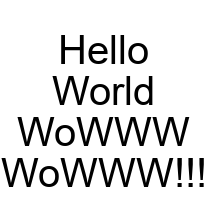

In [27]:
# from PIL import Image, ImageDraw, ImageFont
# import math

# text = "Hello\nWorld\nWoWWW\nWoWWW!!!"
# font_size = 40
# fnt = ImageFont.truetype("arial.ttf", font_size)
# image_size = (224, 224)
# biggest_word = sorted(text.split('\n'), key = lambda x: len(x))[-1]
# max_width = ImageDraw.Draw(Image.new("RGB", (100, 100), (255, 0, 0))).textlength(biggest_word, font=fnt)
# image_size = (math.ceil(max_width), 224)
# out = Image.new("RGB", image_size, (255, 255, 255))
# d = ImageDraw.Draw(out)
# d.multiline_text((image_size[0]/2, image_size[1]/2), text, font=fnt, fill=(0, 0, 0), align ="center", anchor="mm")

# out.show()

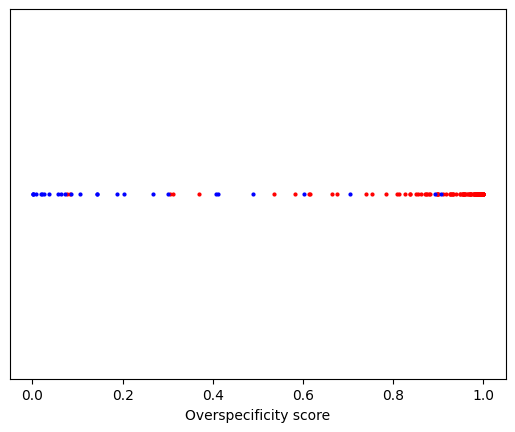

In [18]:
import matplotlib.pyplot as plt

# Example list of tuples
data = overspecificity_score_and_proto_mask

# Separate the data based on the second value
x_0 = [x for x, y, z in data if z == 0]  # First values where the second value is 0
x_1 = [x for x, y, z in data if z == 1]  # First values where the second value is 1

# Create a dummy y-axis value since this is a one-dimensional scatter plot
# y_0 = [y for x, y, z in data if z == 0]  # Dummy y values for blue points
# y_1 = [y for x, y, z in data if z == 1]  # Dummy y values for red points

# y_0 = [1]*len(x_0)
# y_1 = [1.5]*len(x_1)

y_0 = [1]*len(x_0)
y_1 = [1]*len(x_1)

# Plot the data
plt.scatter(x_1, y_1, color='red', label='Value 1', s=4)   # Plot points with second value 1 in red
plt.scatter(x_0, y_0, color='blue', label='Value 0', s=4)  # Plot points with second value 0 in blue


# Additional plot formatting
plt.xlabel('Overspecificity score')
# plt.ylabel('Num descendants')  # Hide y-axis ticks since it's a one-dimensional plot
plt.yticks([])
# plt.legend(loc='best')
# plt.title('One-dimensional Scatter Plot')
plt.show()


In [15]:
!pip show cairosvg

In [64]:
F

<module 'torch.nn.functional' from '/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages/torch/nn/functional.py'>